PYTN-KS16-KELOMPOK 4

* Andhar Siraj Munir
* M. Rizqi Yuwanto
* M. Sadam Abdillah



# 1. PERKENALAN

## 1.1. Latar Belakang

Penyakit kardiovaskular (CVD) merupakan penyebab utama kematian secara global. Data global menunjukkan bahwa setiap tahunnya, sekitar 17.9 juta jiwa kehilangan nyawa akibat CVD, menyumbang sebanyak 31% dari total kematian di seluruh dunia. Salah satu dampak umum dari CVD adalah gagal jantung. Dataset yang akan digunakan dalam konteks ini memiliki 12 atribut yang digunakan untuk memprediksi kemungkinan kematian akibat gagal jantung.

Di sisi lain, banyak kasus CVD dapat dicegah dengan mengelola faktor risiko perilaku, seperti penggunaan tembakau, obesitas, dan konsumsi alkohol berlebihan. Pendeteksian dini sangat penting untuk pasien CVD atau individu yang berisiko, sehingga penanganan dapat dilakukan dengan cepat. Oleh karena itu, pengembangan model yang dapat membantu dalam hal ini menjadi suatu kebutuhan yang diperlukan.

## 1.2. Dataset

Data yang dimanfaatkan adalah dataset berjudul "Heart Failure Clinical Records," yang diambil dari Kaggle yaitu [Heart Failure Prediction](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data).

Dataset ini mengandung informasi mengenai faktor-faktor yang dapat menyebabkan kematian akibat gagal jantung, terdiri dari 13 kolom atribut dan 299 baris data. Atribut yang menjadi fokus adalah "Death Event" atau "Kematian," sementara atribut lainnya akan berperan sebagai prediktor.

## 1.3. Objektif Yang Ingin Dicapai

Objektif yang ingin dicapai melalui analisis yang dilakukan ialah :

* Mengetahui faktor-faktor yang memengaruhi prediksi kematian oleh penyakit gagal jantung secara signifikan.
* Memprediksi kematian menggunakan metode ensemble berdasar pada faktor-faktor yang memengaruhinya.

# 2. IMPORT LIBRARY

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score
import pickle
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# 3. DATA LOADING

## 3.1 Load Data

In [3]:
# Mentransformasikan file yang ada di google drive
! gdown --id 1DkdCGmdihT77RfVvVnarM-_1g1uxdtQT

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DkdCGmdihT77RfVvVnarM-_1g1uxdtQT
To: /content/heart_failure_clinical_records_dataset.csv
100% 12.2k/12.2k [00:00<00:00, 33.0MB/s]


In [4]:
# Read Dataset
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
# Menampilkan Dataset
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
# lowercase nama kolom
data.columns = map(str.lower, data.columns)
#ubah nama kolom
data = data.rename(columns={'anaemia':'anemia'})
data

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## 3.2 Split Data

In [6]:
# split fitur target yaitu raintomorrow
data_feat = data.drop(['death_event'], axis=1)
data_target = data['death_event']

print(data_feat.head(2))
print(data_target.head(2))

    age  anemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0       0                       582         0                 20   
1  55.0       0                      7861         0                 38   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   

   smoking  time  
0        0     4  
1        0     6  
0    1
1    1
Name: death_event, dtype: int64


In [7]:
# test_size = 0.20 artinya data testing 20% dan data training 70%
# random_state = 42 digunakan untuk menspesifikasikan random seed pada saat pembagian data training dan data testing

X_train, X_test, y_train, y_test = train_test_split(data_feat, data_target, test_size = 0.2, random_state = 42, stratify=data_target)

In [8]:
# Mengetahui dimensi data train dan data test
print('Dimensi feature data train :', X_train.shape)
print('Dimensi target data train :', y_train.shape)
print('Dimensi feature data test :', X_test.shape)
print('Dimensi target data test :', y_test.shape)

Dimensi feature data train : (239, 12)
Dimensi target data train : (239,)
Dimensi feature data test : (60, 12)
Dimensi target data test : (60,)


# 4. Eksplorasi Data Analisis

Mengeksplor data train

## 4.1 Informasi Data

In [9]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

Menampilkan 5 data teratas

In [10]:
df_train.head()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
115,58.0,1,400,0,40,0,164000.0,1.0,139,0,0,91,0
23,53.0,0,63,1,60,0,368000.0,0.8,135,1,0,22,0
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
247,64.0,0,143,0,25,0,246000.0,2.4,135,1,0,214,0
194,45.0,0,582,0,20,1,126000.0,1.6,135,1,0,180,1


Menampilkan 5 data terakhir

In [11]:
df_train.tail()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
229,72.0,0,211,0,25,0,274000.0,1.2,134,0,0,207,0
131,60.0,1,1082,1,45,0,250000.0,6.1,131,1,0,107,0
177,49.0,1,69,0,50,0,132000.0,1.0,140,0,0,147,0
112,50.0,0,369,1,25,0,252000.0,1.6,136,1,0,90,0
28,58.0,1,60,0,38,0,153000.0,5.8,134,1,0,26,1


Menampilkan dimensi dataset

In [12]:
df_train.shape

(239, 13)

Terdapat 101822 baris dan 23 kolom pada dataset.

Menampilkan informasi detail

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 115 to 28
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anemia                    239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
 12  death_event               239 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 26.1 KB


Dari informasi diatas terdapat 3 type data float, dan 10 type data int.

Menampilkan nama-nama kolom pada dataset

In [14]:
df_train.columns

Index(['age', 'anemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

Menampilkan ringkasan statistik dari kolom data numerik

In [15]:
df_train.describe()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,61.072527,0.447699,602.790795,0.447699,37.887029,0.372385,263670.546444,1.391715,136.527197,0.640167,0.317992,127.217573,0.322176
std,11.443865,0.498301,1012.362885,0.498301,11.994738,0.484455,99410.331023,1.089060,4.425657,0.480958,0.466674,77.575734,0.468291
min,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.500000,0.000000,117.000000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,69.500000,0.000000
50%,60.000000,0.000000,253.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,112.000000,0.000000
75%,69.500000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,139.000000,1.000000,1.000000,197.500000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,280.000000,1.000000


Menampilkan nilai unik setiap kolom

In [16]:
df_train.nunique()

age                          43
anemia                        2
creatinine_phosphokinase    176
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   156
serum_creatinine             34
serum_sodium                 26
sex                           2
smoking                       2
time                        129
death_event                   2
dtype: int64

Menampilkan missing value pada dataset

In [17]:
df_train.isnull().sum()

age                         0
anemia                      0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

In [18]:
# Menghitung presentase missing values pada setiap atribut
df_train.apply(lambda x: f'{((x.isnull().sum()/df_train.shape[0])*100).round(2)} %')

age                         0.0 %
anemia                      0.0 %
creatinine_phosphokinase    0.0 %
diabetes                    0.0 %
ejection_fraction           0.0 %
high_blood_pressure         0.0 %
platelets                   0.0 %
serum_creatinine            0.0 %
serum_sodium                0.0 %
sex                         0.0 %
smoking                     0.0 %
time                        0.0 %
death_event                 0.0 %
dtype: object

In [19]:
# Daftar karakter yang digunakan untuk mengidentifikasi kekosongan
karakter_kosong = []

for kolom in df_train.columns:  # Mengganti 'df_train' dengan nama DataFrame Anda
    for nilai in df_train[kolom]:
        if pd.isna(nilai):
            continue  # Skip jika sudah NaN
        elif isinstance(nilai, str) and not nilai.strip():  # Periksa apakah string kosong atau hanya berisi spasi
            karakter_kosong.append(nilai)

karakter_kosong_unik = set(karakter_kosong)

print("Karakter yang mewakili kekosongan:", karakter_kosong_unik)

Karakter yang mewakili kekosongan: set()


Menampilkan data duplikat

In [20]:
df_train.duplicated().sum()

0

## 4.2 Distribusi Kolom Death Event

In [21]:
df_train['death_event'].value_counts()

0    162
1     77
Name: death_event, dtype: int64

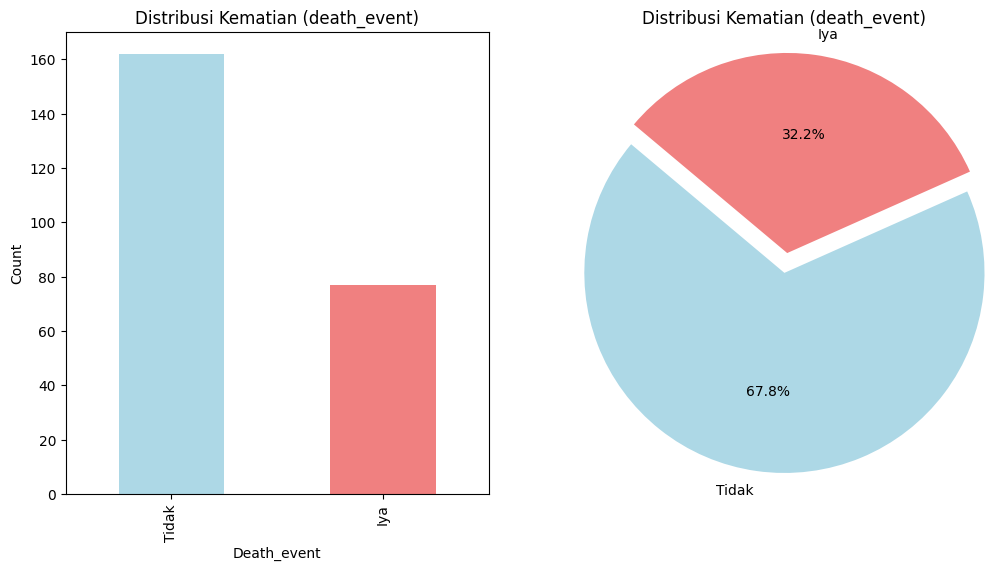

In [22]:
import matplotlib.pyplot as plt

# Mengimport data
data = df_train['death_event'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Iya"
data.index = data.index.map({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi Kematian (death_event)')
axs[0].set_xlabel('Death_event')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi Kematian (death_event)')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi death_event yang diberikan:

Nilai 0 (Tidak): Terdapat 168 observasi.
Nilai 1 (Iya): Terdapat 71 observasi.

Dengan demikian, sekitar 70.29% dari total pasien tidak mengalami kematian (death event), sementara sekitar 29.71% mengalami kematian (death event). Ini memberikan gambaran singkat tentang distribusi peristiwa kematian (death event) dalam dataset dan dapat digunakan sebagai dasar untuk analisis lebih lanjut terkait faktor-faktor yang mempengaruhi kejadian tersebut.

## 4.3 Distribusi Kolom Sex

### 4.3.1 Distribusi Jumlah Jenis Kelamin

In [23]:
df_train['sex'].value_counts()

1    153
0     86
Name: sex, dtype: int64

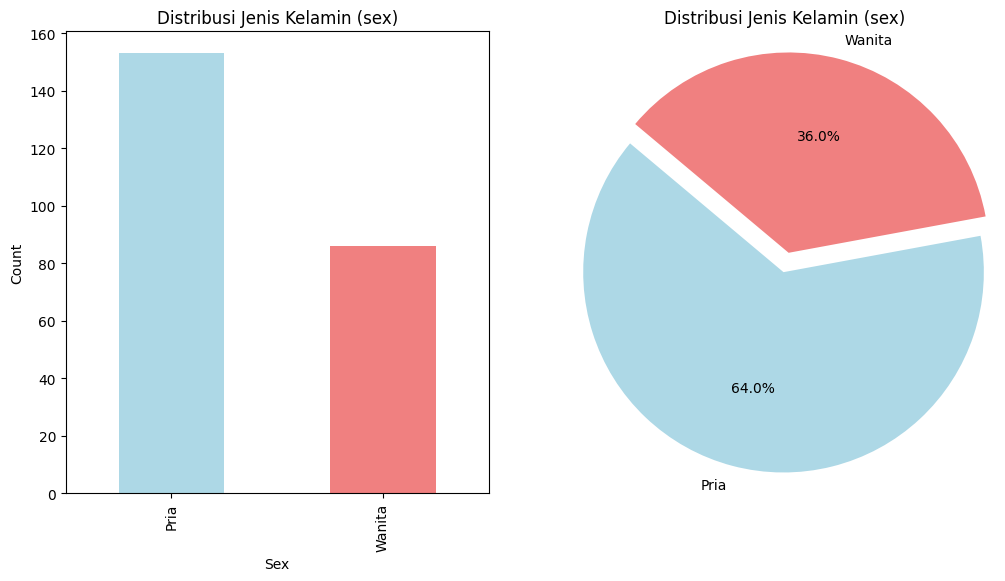

In [24]:
import matplotlib.pyplot as plt

# Mengimport data
data = df_train['sex'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Ya"
data.index = data.index.map({0: 'Wanita', 1: 'Pria'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi Jenis Kelamin (sex)')
axs[0].set_xlabel('Sex')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Wanita"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi Jenis Kelamin (sex)')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi sex yang diberikan:

Terdapat 154 data dengan nilai 1, yang mewakili pria.
Terdapat 85 data dengan nilai 0, yang mewakili wanita.

Dengan demikian, sekitar 64.42% dari total pasien dalam dataset ini adalah pria, sementara sekitar 35.58% adalah wanita.

### 4.3.2 Distribusi jenis kelamin terhadap death event

In [25]:
man_yes = df_train[(df_train['sex'] == 1) & (df_train['death_event'] == 1)].shape[0]
man_no = df_train[(df_train['sex'] == 1) & (df_train['death_event'] == 0)].shape[0]
woman_yes = df_train[(df_train['sex'] == 0) & (df_train['death_event'] == 1)].shape[0]
woman_no = df_train[(df_train['sex'] == 0) & (df_train['death_event'] == 0)].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("Man & Yes:", man_yes)
print("Man & No:", man_no)
print("Woman & Yes:", woman_yes)
print("Woman & No:", woman_no)

Man & Yes: 50
Man & No: 103
Woman & Yes: 27
Woman & No: 59


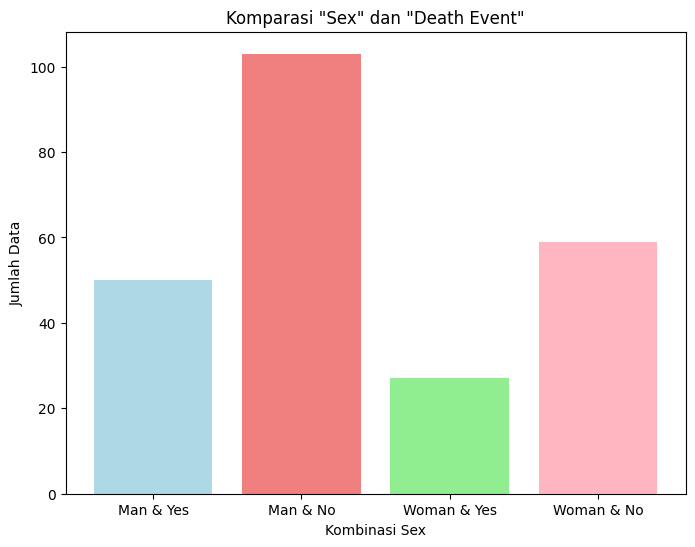

In [26]:
# Membuat bar chart
labels = ['Man & Yes', 'Man & No', 'Woman & Yes', 'Woman & No']
counts = [man_yes, man_no, woman_yes, woman_no]

colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
# Menambahkan judul dan label sumbu
plt.title('Komparasi "Sex" dan "Death Event"')
plt.xlabel('Kombinasi Sex')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

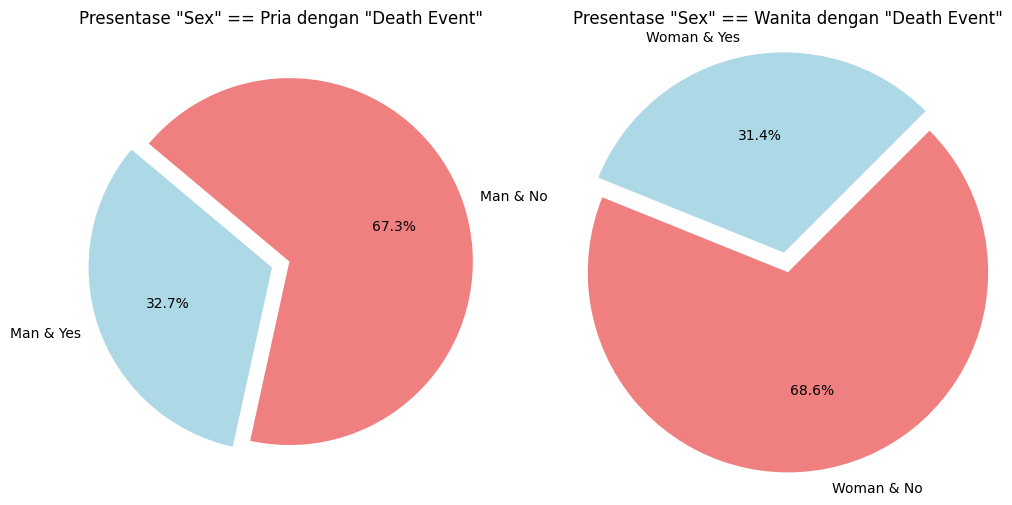

In [27]:
import matplotlib.pyplot as plt

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[0].pie(counts[:2], labels=labels[:2], autopct='%1.1f%%', colors=colors[:2], startangle=140, explode=explode)
axs[0].set_title('Presentase "Sex" == Pria dengan "Death Event"')
axs[0].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(counts[2:], labels=labels[2:], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[1].set_title('Presentase "Sex" == Wanita dengan "Death Event"')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'Sex' dan 'Death Event', kita dapat membuat kesimpulan sebagai berikut:

Presentase pria mengalami death event adalah 27.9%, dan presentase wanita mengalami death event adalah 32.9%

Pada kasus tersebut presentase perempuan lebih tinggi

### 4.3.3 Chi2

In [33]:
contingency_table = pd.crosstab(df_train['sex'], df_train['death_event'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for {'sex'} and {'death_event'}:")
print(f"  Chi-squared statistic: {chi2}")
print(f"  P-value: {p}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
print(expected)
print("\n")

Chi-squared test for sex and death_event:
  Chi-squared statistic: 0.0035679000282283716
  P-value: 0.9523691635564261
  Degrees of freedom: 1
  Expected frequencies:
[[ 58.29288703  27.70711297]
 [103.70711297  49.29288703]]




Uji Chi-squared menunjukkan tidak ada hubungan signifikan antara jenis kelamin dan kejadian kematian pada populasi yang diuji.

P-nilai yang tinggi (0.9523) menunjukkan kurangnya bukti statistik untuk menolak hipotesis nol, mengindikasikan ketidakbermaknaan hubungan antara jenis kelamin dan kejadian kematian.

## 4.4 Distribusi data berdasarkan Smoking

### 4.4.1 Distribusi Jumlah Smoking

In [34]:
df_train['smoking'].value_counts()

0    163
1     76
Name: smoking, dtype: int64

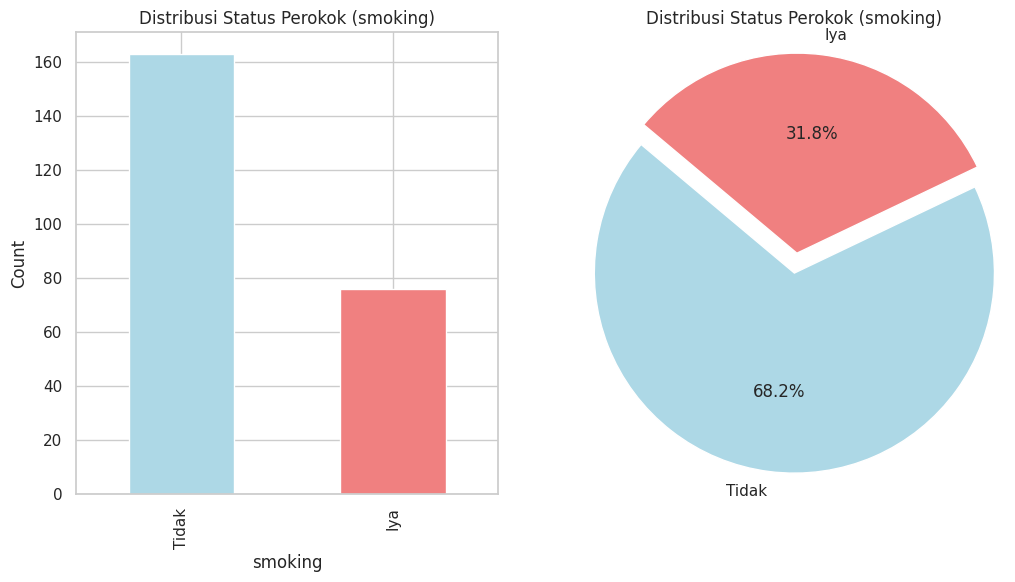

In [35]:
import matplotlib.pyplot as plt

# Mengimport data
data = df_train['smoking'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Ya"
data.index = data.index.map({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi Status Perokok (smoking)')
axs[0].set_xlabel('smoking')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Wanita"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi Status Perokok (smoking)')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi smoking yang diberikan:

Terdapat 75 data dengan nilai 1, yang mewakili perokok. Terdapat 164 data dengan nilai 0, yang mewakili bukan perokok.

Dengan demikian, sekitar 68.6% dari total pasien dalam dataset ini adalah bukan prokok, sementara sekitar 31.4% adalah perokok.

### 4.4.2 Distribusi Smoking terhadap Death event

In [36]:
smoking_yes = df_train[(df_train['smoking'] == 1) & (df_train['death_event'] == 1)].shape[0]
smoking_no = df_train[(df_train['smoking'] == 1) & (df_train['death_event'] == 0)].shape[0]
nosmoking_yes = df_train[(df_train['smoking'] == 0) & (df_train['death_event'] == 1)].shape[0]
nosmoking_no = df_train[(df_train['smoking'] == 0) & (df_train['death_event'] == 0)].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("smoking & Yes:", smoking_yes)
print("smoking & No:", smoking_no)
print("nosmoking & Yes:", nosmoking_yes)
print("nosmoking & No:", nosmoking_no)

smoking & Yes: 26
smoking & No: 50
nosmoking & Yes: 51
nosmoking & No: 112


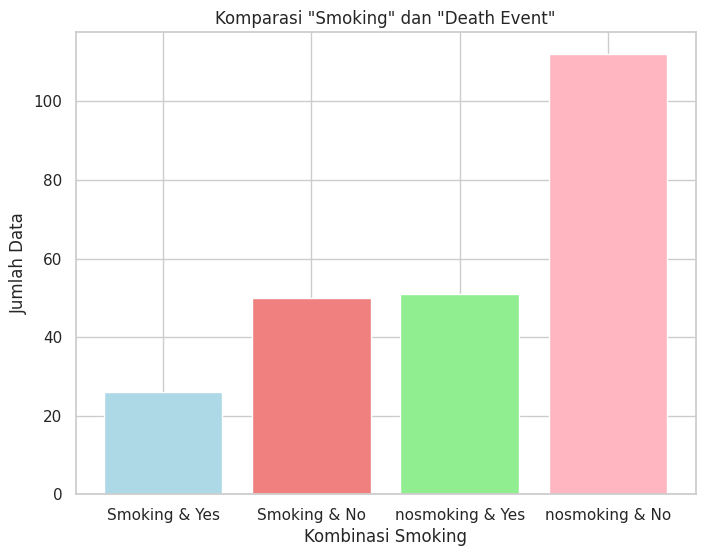

In [37]:
# Membuat bar chart
labels = ['Smoking & Yes', 'Smoking & No', 'nosmoking & Yes', 'nosmoking & No']
counts = [smoking_yes, smoking_no, nosmoking_yes, nosmoking_no]

colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
# Menambahkan judul dan label sumbu
plt.title('Komparasi "Smoking" dan "Death Event"')
plt.xlabel('Kombinasi Smoking')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

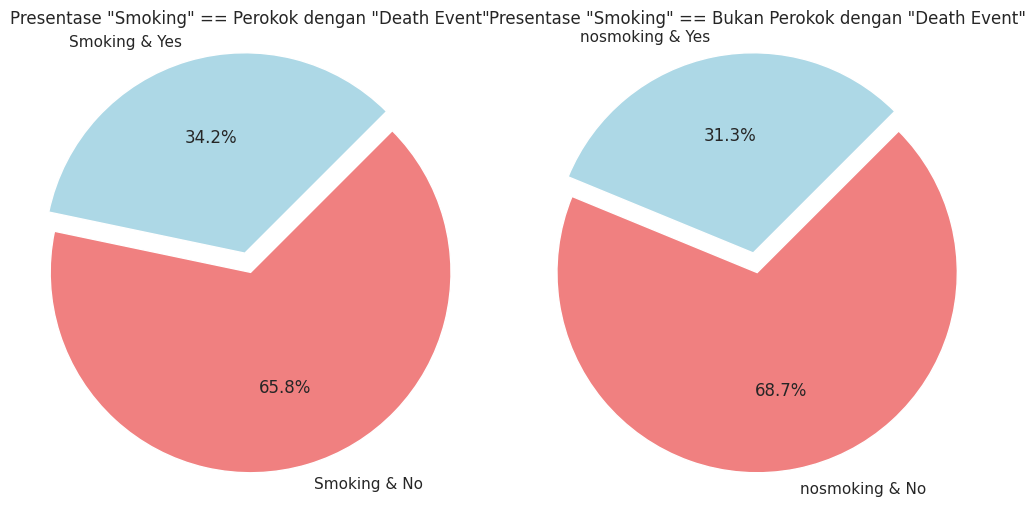

In [38]:
# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[0].pie(counts[:2], labels=labels[:2], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[0].set_title('Presentase "Smoking" == Perokok dengan "Death Event"')
axs[0].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(counts[2:], labels=labels[2:], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[1].set_title('Presentase "Smoking" == Bukan Perokok dengan "Death Event"')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'Smoking' dan 'Death Event', kita dapat membuat kesimpulan sebagai berikut:

Presentase perokok mengalami death event adalah 26.7%, dan presentase bukan perokok mengalami death event adalah 31.1%

Pada kasus tersebut presentase bukan perokok lebih tinggi

### 4.4.3 Chi2

In [39]:
contingency_table = pd.crosstab(df_train['smoking'], df_train['death_event'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for {'smoking'} and {'death_event'}:")
print(f"  Chi-squared statistic: {chi2}")
print(f"  P-value: {p}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
print(expected)
print("\n")

Chi-squared test for smoking and death_event:
  Chi-squared statistic: 0.09095246009665886
  P-value: 0.7629697740506189
  Degrees of freedom: 1
  Expected frequencies:
[[110.48535565  52.51464435]
 [ 51.51464435  24.48535565]]




Pada uji Chi-squared untuk merokok dan kejadian kematian, P-nilai tinggi (0.7629) menunjukkan kurangnya bukti statistik untuk menolak hipotesis nol, menegaskan bahwa tidak ada hubungan signifikan antara merokok dan kejadian kematian dalam populasi yang diuji.

## 4.5 Distribusi data berdasarkan Anemia

### 4.5.1 Distribusi Jumlah Anemia

In [40]:
df_train['anemia'].value_counts()

0    132
1    107
Name: anemia, dtype: int64

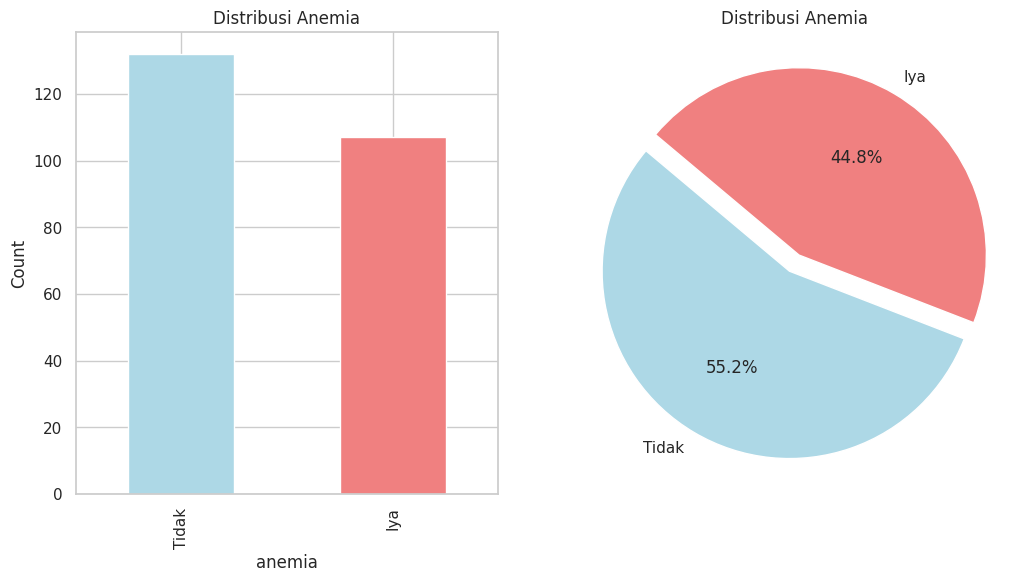

In [41]:
# Mengimport data
data = df_train['anemia'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Ya"
data.index = data.index.map({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi Anemia')
axs[0].set_xlabel('anemia')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Wanita"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi Anemia')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi anemia yang diberikan:

Terdapat 104 data dengan nilai 1, yang mewakili bukan anemia. Terdapat 135 data dengan nilai 0, yang mewakili anemia.

Dengan demikian, sekitar 43.5% dari total pasien dalam dataset ini adalah anemia, sementara sekitar 56.5% adalah bukan anemia.

### 4.5.2 Distribusi Anemia terhadap Death event

In [42]:
anemia_yes = df_train[(df_train['anemia'] == 1) & (df_train['death_event'] == 1)].shape[0]
anemia_no = df_train[(df_train['anemia'] == 1) & (df_train['death_event'] == 0)].shape[0]
noanemia_yes = df_train[(df_train['anemia'] == 0) & (df_train['death_event'] == 1)].shape[0]
noanemia_no = df_train[(df_train['anemia'] == 0) & (df_train['death_event'] == 0)].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("anemia & Yes:", anemia_yes)
print("anemia & No:", anemia_no)
print("noanemia & Yes:", noanemia_yes)
print("noanemia & No:", noanemia_no)

anemia & Yes: 39
anemia & No: 68
noanemia & Yes: 38
noanemia & No: 94


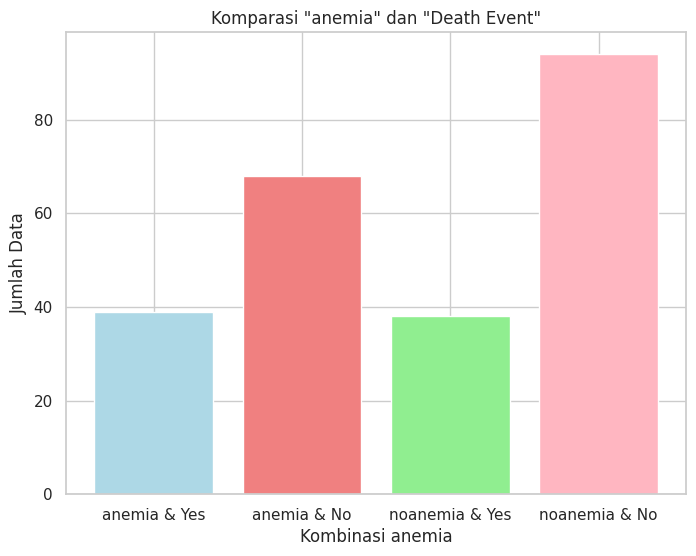

In [43]:
# Membuat bar chart
labels = ['anemia & Yes', 'anemia & No', 'noanemia & Yes', 'noanemia & No']
counts = [anemia_yes, anemia_no, noanemia_yes, noanemia_no]

colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
# Menambahkan judul dan label sumbu
plt.title('Komparasi "anemia" dan "Death Event"')
plt.xlabel('Kombinasi anemia')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

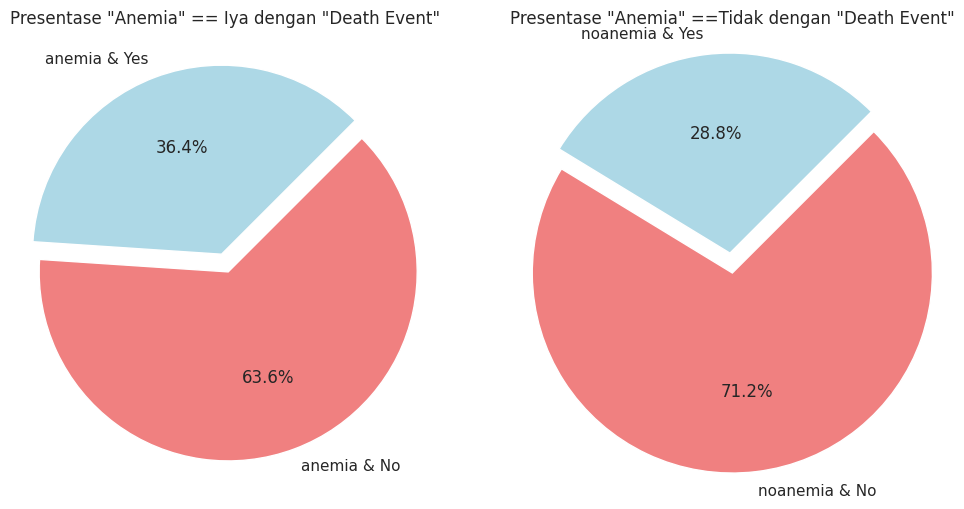

In [44]:
# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[0].pie(counts[:2], labels=labels[:2], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[0].set_title('Presentase "Anemia" == Iya dengan "Death Event"')
axs[0].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(counts[2:], labels=labels[2:], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[1].set_title('Presentase "Anemia" ==Tidak dengan "Death Event"')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'Anemia' dan 'Death Event', kita dapat membuat kesimpulan sebagai berikut:

Presentase anemia mengalami death event adalah 32.7%, dan presentase tidak anemia mengalami death event adalah 27.4%

Pada kasus tersebut presentase anemia lebih tinggi

### 4.5.3 Chi2

In [45]:
contingency_table = pd.crosstab(df_train['anemia'], df_train['death_event'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for {'anemia'} and {'death_event'}:")
print(f"  Chi-squared statistic: {chi2}")
print(f"  P-value: {p}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
print(expected)
print("\n")

Chi-squared test for anemia and death_event:
  Chi-squared statistic: 1.2567124822122235
  P-value: 0.2622742913948644
  Degrees of freedom: 1
  Expected frequencies:
[[89.47280335 42.52719665]
 [72.52719665 34.47280335]]




Uji Chi-squared untuk anemia dan kejadian kematian menunjukkan nilai statistik 1.2567 (P-value 0.2623), menandakan kurangnya hubungan signifikan.

## 4.6 Distribusi data berdasarkan Diabetes

### 4.6.1 Distribusi Jumlah Diabetes

In [46]:
df_train['diabetes'].value_counts()

0    132
1    107
Name: diabetes, dtype: int64

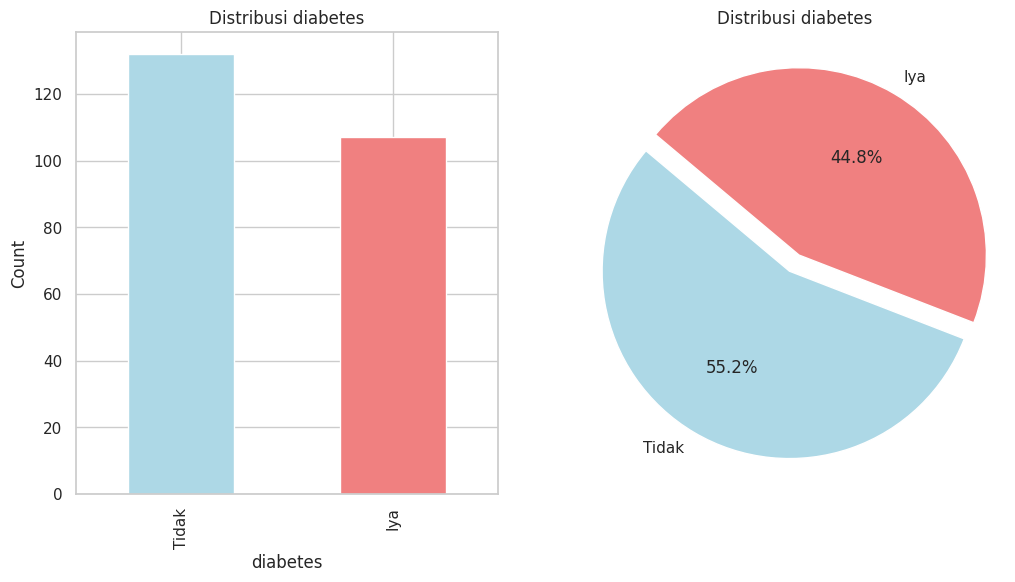

In [47]:
# Mengimport data
data = df_train['diabetes'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Ya"
data.index = data.index.map({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi diabetes')
axs[0].set_xlabel('diabetes')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Wanita"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi diabetes')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi diabetes yang diberikan:

Terdapat 142 data dengan nilai 0, yang mewakili tidak diabetes. Terdapat 135 data dengan nilai 1, yang mewakili diabetes.

Dengan demikian, sekitar 59.4% dari total pasien dalam dataset ini adalah tidak diabetes, sementara sekitar 40.6% adalah diabetes.

### 4.6.2 Distribusi Diabetes terhadap Death event

In [48]:
diabetes_yes = df_train[(df_train['diabetes'] == 1) & (df_train['death_event'] == 1)].shape[0]
diabetes_no = df_train[(df_train['diabetes'] == 1) & (df_train['death_event'] == 0)].shape[0]
nodiabetes_yes = df_train[(df_train['diabetes'] == 0) & (df_train['death_event'] == 1)].shape[0]
nodiabetes_no = df_train[(df_train['diabetes'] == 0) & (df_train['death_event'] == 0)].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("diabetes & Yes:", diabetes_yes)
print("diabetes & No:", diabetes_no)
print("nodiabetes & Yes:", nodiabetes_yes)
print("nodiabetes & No:", nodiabetes_no)

diabetes & Yes: 37
diabetes & No: 70
nodiabetes & Yes: 40
nodiabetes & No: 92


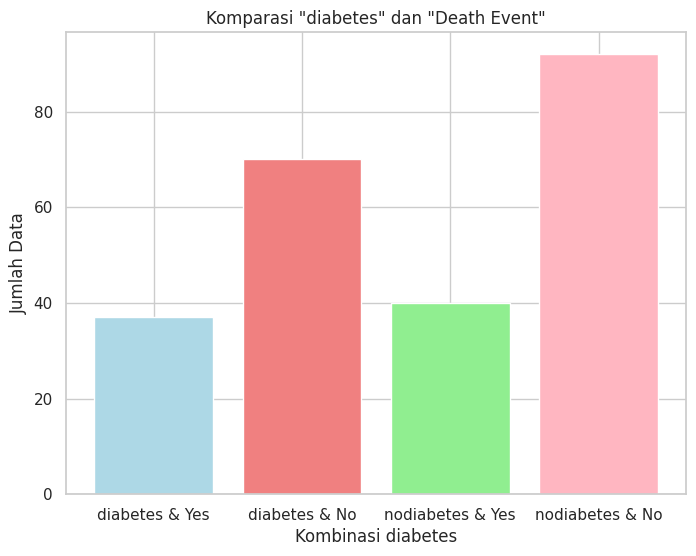

In [49]:
# Membuat bar chart
labels = ['diabetes & Yes', 'diabetes & No', 'nodiabetes & Yes', 'nodiabetes & No']
counts = [diabetes_yes, diabetes_no, nodiabetes_yes, nodiabetes_no]

colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
# Menambahkan judul dan label sumbu
plt.title('Komparasi "diabetes" dan "Death Event"')
plt.xlabel('Kombinasi diabetes')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

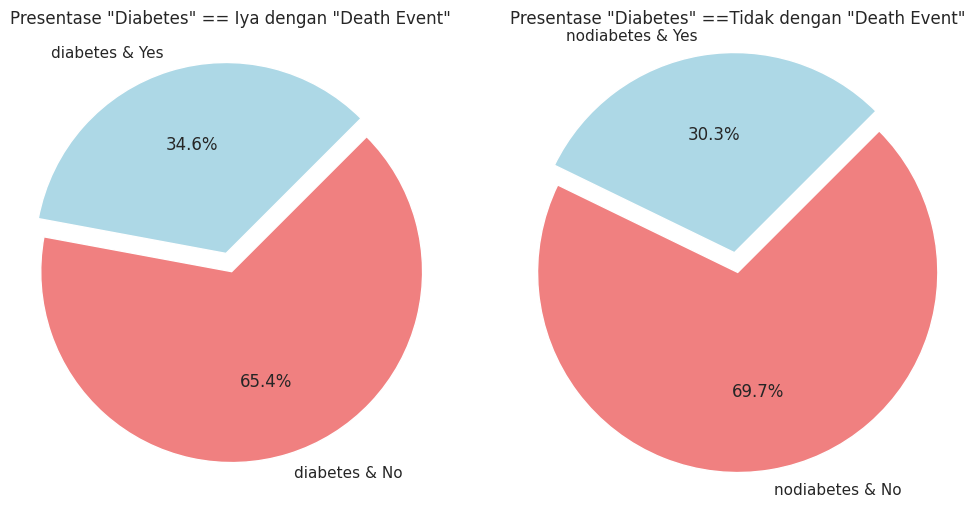

In [50]:
# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[0].pie(counts[:2], labels=labels[:2], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[0].set_title('Presentase "Diabetes" == Iya dengan "Death Event"')
axs[0].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(counts[2:], labels=labels[2:], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[1].set_title('Presentase "Diabetes" ==Tidak dengan "Death Event"')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'diabetes' dan 'Death Event', kita dapat membuat kesimpulan sebagai berikut:

Presentase diabetes mengalami death event adalah 29.9%, dan presentase tidak diabetes mengalami death event adalah 29.6%

Pada kasus tersebut presentase diabetes lebih tinggi sedikit

### 4.6.3 Chi2

In [51]:
contingency_table = pd.crosstab(df_train['diabetes'], df_train['death_event'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for {'diabetes'} and {'death_event'}:")
print(f"  Chi-squared statistic: {chi2}")
print(f"  P-value: {p}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
print(expected)
print("\n")

Chi-squared test for diabetes and death_event:
  Chi-squared statistic: 0.3184358938129121
  P-value: 0.5725491350574426
  Degrees of freedom: 1
  Expected frequencies:
[[89.47280335 42.52719665]
 [72.52719665 34.47280335]]




Uji Chi-squared untuk diabetes dan kejadian kematian menunjukkan statistik Chi-squared sebesar 0.3184 (P-value 0.5725). Dengan P-nilai yang tinggi, tidak terdapat hubungan signifikan antara diabetes dan kejadian kematian dalam populasi yang diuj

## 4.7 Distribusi data berdasarkan High Blood Pressure

### 4.7.1 Distribusi Jumlah High Blood Pressure

In [52]:
df_train['high_blood_pressure'].value_counts()

0    150
1     89
Name: high_blood_pressure, dtype: int64

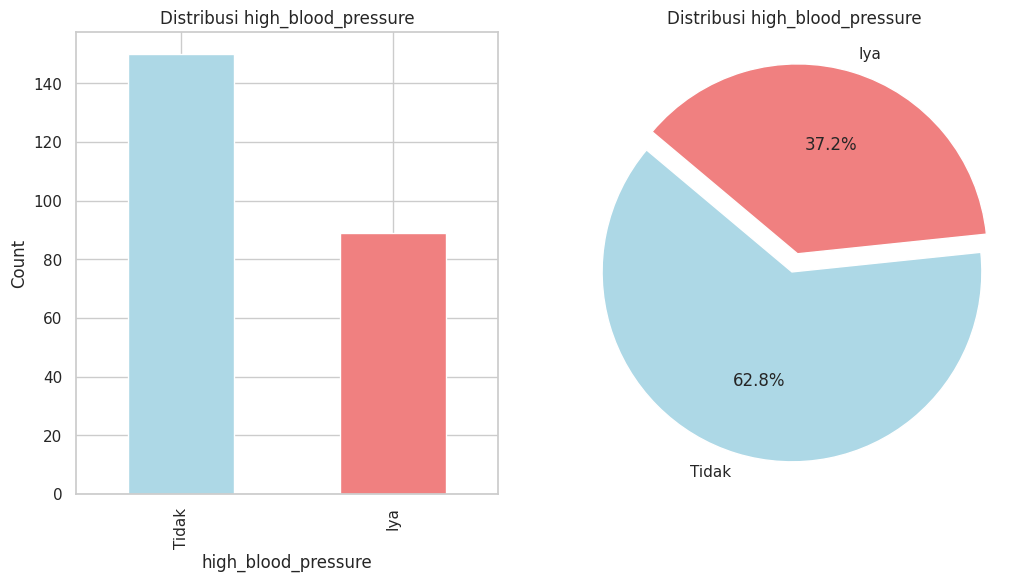

In [53]:
# Mengimport data
data = df_train['high_blood_pressure'].value_counts()

# Mengganti nilai 0 dengan "Tidak" dan nilai 1 dengan "Ya"
data.index = data.index.map({0: 'Tidak', 1: 'Iya'})

colors = ['lightblue', 'lightcoral']

# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Bar Plot
data.plot(kind='bar', color=colors, ax=axs[0])
axs[0].set_title('Distribusi high_blood_pressure')
axs[0].set_xlabel('high_blood_pressure')
axs[0].set_ylabel('Count')

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Wanita"
axs[1].pie(data, labels=data.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=explode)
axs[1].set_title('Distribusi high_blood_pressure')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari data distribusi darah tinggi yang diberikan:

Terdapat 155 data dengan nilai 0, yang mewakili tidak darah tinggi. Terdapat 84 data dengan nilai 1, yang mewakili darah tinggi.

Dengan demikian, sekitar 64.9% dari total pasien dalam dataset ini adalah tidak darah tinggi, sementara sekitar 35.1% adalah darah tinggi.

### 4.7.2 Distribusi High Blood Pressure terhadap Death event

In [54]:
high_blood_pressure_yes = df_train[(df_train['high_blood_pressure'] == 1) & (df_train['death_event'] == 1)].shape[0]
high_blood_pressure_no = df_train[(df_train['high_blood_pressure'] == 1) & (df_train['death_event'] == 0)].shape[0]
nohigh_blood_pressure_yes = df_train[(df_train['high_blood_pressure'] == 0) & (df_train['death_event'] == 1)].shape[0]
nohigh_blood_pressure_no = df_train[(df_train['high_blood_pressure'] == 0) & (df_train['death_event'] == 0)].shape[0]

# Menampilkan jumlah data dalam setiap kondisi
print("high_blood_pressure & Yes:", high_blood_pressure_yes)
print("high_blood_pressure & No:", high_blood_pressure_no)
print("nohigh_blood_pressure & Yes:", nohigh_blood_pressure_yes)
print("nohigh_blood_pressure & No:", nohigh_blood_pressure_no)

high_blood_pressure & Yes: 34
high_blood_pressure & No: 55
nohigh_blood_pressure & Yes: 43
nohigh_blood_pressure & No: 107


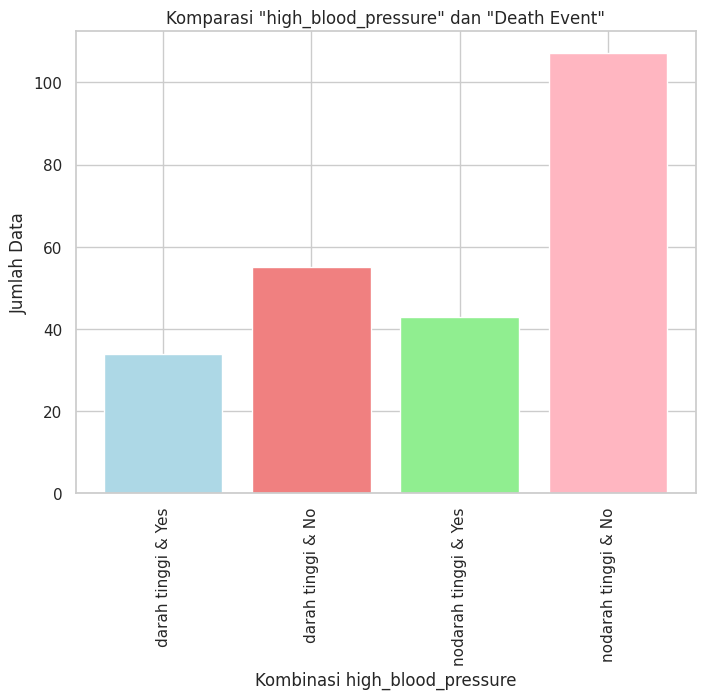

In [55]:
# Membuat bar chart
labels = ['darah tinggi & Yes', 'darah tinggi & No', 'nodarah tinggi & Yes', 'nodarah tinggi & No']
counts = [high_blood_pressure_yes, high_blood_pressure_no, nohigh_blood_pressure_yes, nohigh_blood_pressure_no]

colors=['lightblue', 'lightcoral', 'lightgreen', 'lightpink']

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=colors)
# Menambahkan judul dan label sumbu
plt.title('Komparasi "high_blood_pressure" dan "Death Event"')
plt.xlabel('Kombinasi high_blood_pressure')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)

# Menampilkan plot
plt.show()

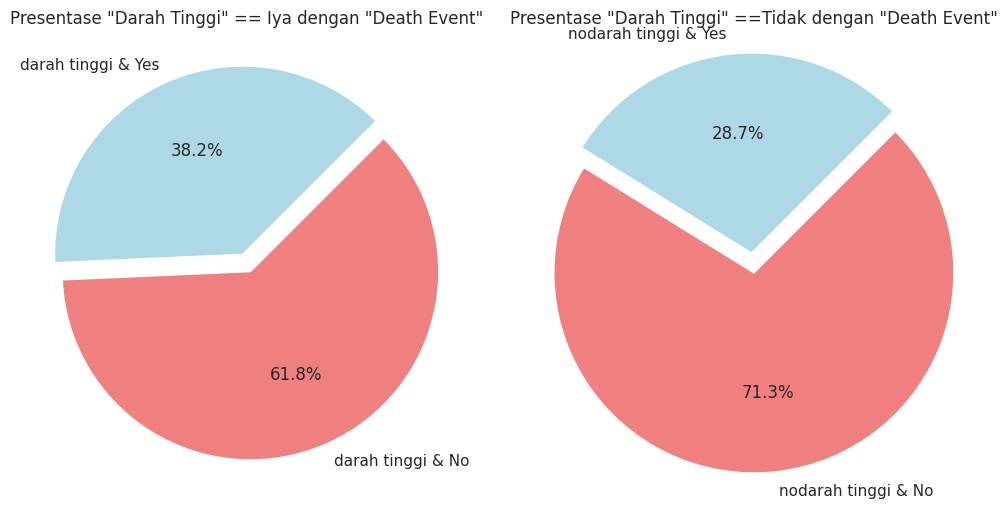

In [56]:
# Membuat gambar dengan dua subplot (bar plot dan pie chart)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[0].pie(counts[:2], labels=labels[:2], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[0].set_title('Presentase "Darah Tinggi" == Iya dengan "Death Event"')
axs[0].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Subplot 2 - Pie Chart
explode = (0.1, 0)  # Mengeksplosi "Yes"
axs[1].pie(counts[2:], labels=labels[2:], autopct='%1.1f%%', colors=colors[:2], startangle=45, explode=explode)
axs[1].set_title('Presentase "Darah Tinggi" ==Tidak dengan "Death Event"')
axs[1].axis('equal')  # Memastikan pie chart berbentuk lingkaran

# Menampilkan plot
plt.show()


Dari hasil perhitungan jumlah data dalam setiap kondisi kombinasi 'darah tinggi' dan 'Death Event', kita dapat membuat kesimpulan sebagai berikut:

Presentase darah tinggi mengalami death event adalah 33.5%, dan presentase tidak darah tinggi mengalami death event adalah 27.7%

Pada kasus tersebut presentase darah tinggi lebih tinggi

### 4.7.3 Chi2

In [57]:
contingency_table = pd.crosstab(df_train['high_blood_pressure'], df_train['death_event'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared test for {'high_blood_pressure'} and {'death_event'}:")
print(f"  Chi-squared statistic: {chi2}")
print(f"  P-value: {p}")
print(f"  Degrees of freedom: {dof}")
print("  Expected frequencies:")
print(expected)
print("\n")

Chi-squared test for high_blood_pressure and death_event:
  Chi-squared statistic: 1.909616212958909
  P-value: 0.1670058965731951
  Degrees of freedom: 1
  Expected frequencies:
[[101.67364017  48.32635983]
 [ 60.32635983  28.67364017]]




Uji Chi-squared untuk tekanan darah tinggi (high_blood_pressure) dan kejadian kematian menunjukkan statistik Chi-squared sebesar 1.9096 (P-value 0.1670). Dengan P-nilai yang relatif tinggi, tidak terdapat hubungan signifikan antara tekanan darah tinggi dan kejadian kematian dalam populasi yang diuji.

## 4.8 Distribusi data berdasarkan Usia

### 4.8.1 Distribusi Jumlah Usia

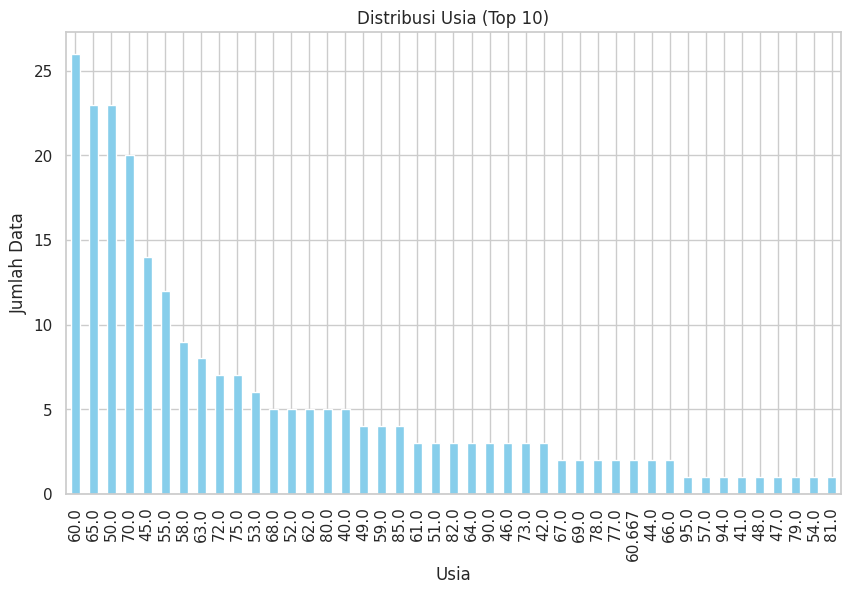

In [58]:
# Misalkan df_train adalah DataFrame Anda
age_counts = df_train['age'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Usia (Top 10)')
plt.xlabel('Usia')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=90)  # Untuk memutar label sumbu x jika perlu

# Menampilkan plot
plt.show()


### 4.8.2 Boxplot Usia

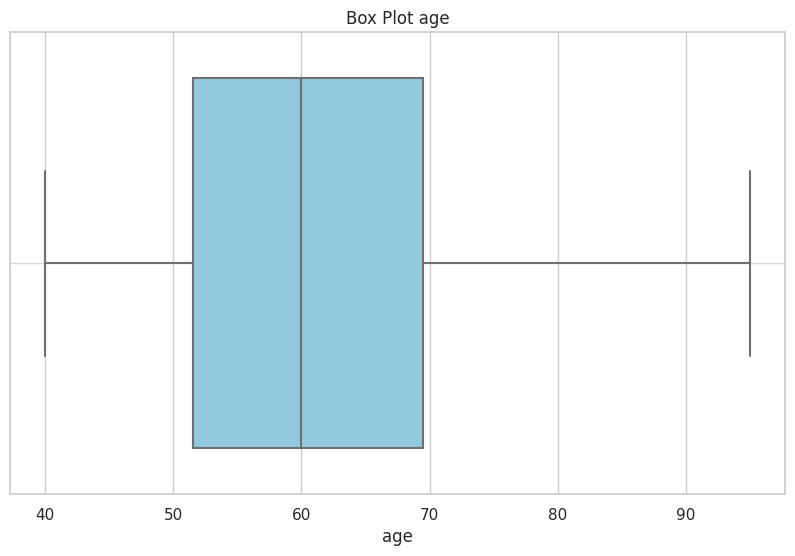

In [59]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['age'].dropna(), color='skyblue')
plt.title('Box Plot age')
plt.xlabel('age')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.8.3 Distribusi Usia terhadap Death event

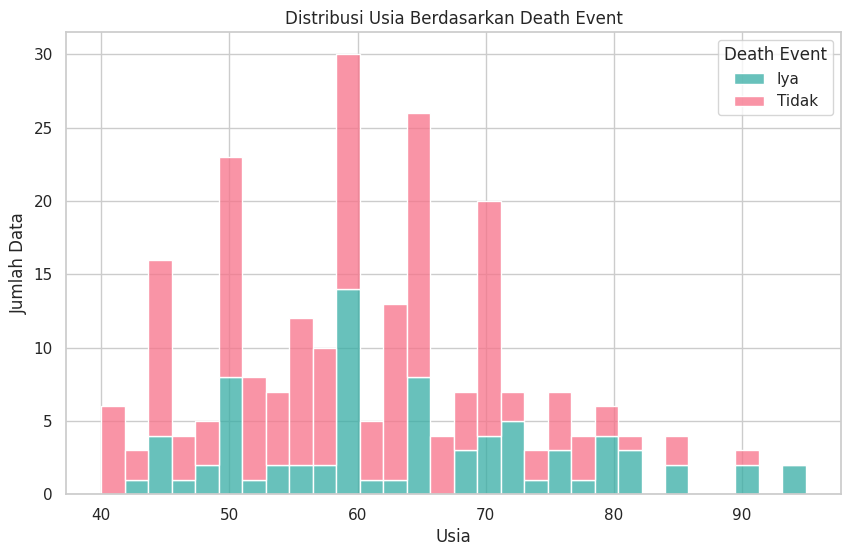

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='age', hue='death_event', multiple='stack', bins=30, palette='husl')
plt.title('Distribusi Usia Berdasarkan Death Event')
plt.xlabel('Usia')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Pola death event:

Pada usia muda sekitar 40-50 tahun, terlihat lebih banyak kasus tanpa death event('Tidak') daripada dengan death event('Iya').
Pada usia sekitar 60 tahun, terjadi peningkatan yang signifikan dalam jumlah kasus death event('Yes').
Terdapat variasi dalam jumlah kasus di sekitar usia 60-70 tahun.

## 4.9 Distribusi data berdasarkan creatinine_phosphokinase (CPK)

### 4.9.1 Boxplot CPK

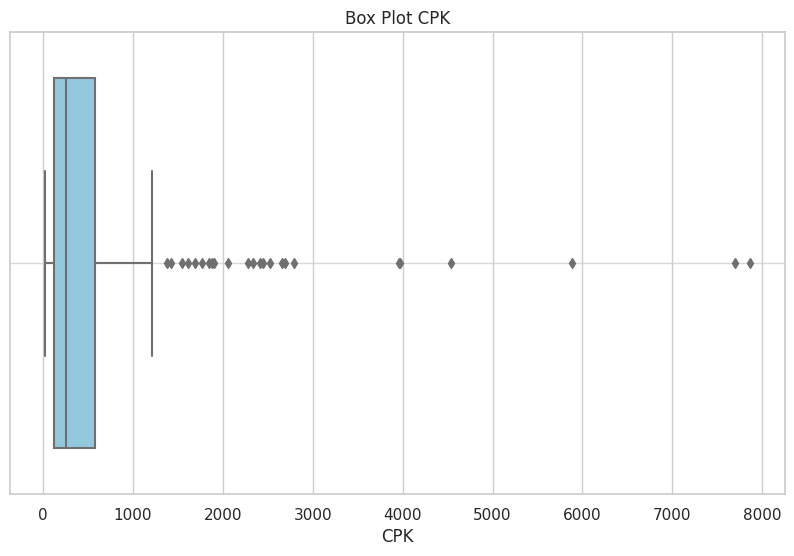

In [61]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['creatinine_phosphokinase'].dropna(), color='skyblue')
plt.title('Box Plot CPK')
plt.xlabel('CPK')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.9.2 Distribusi CPK terhadap Death event

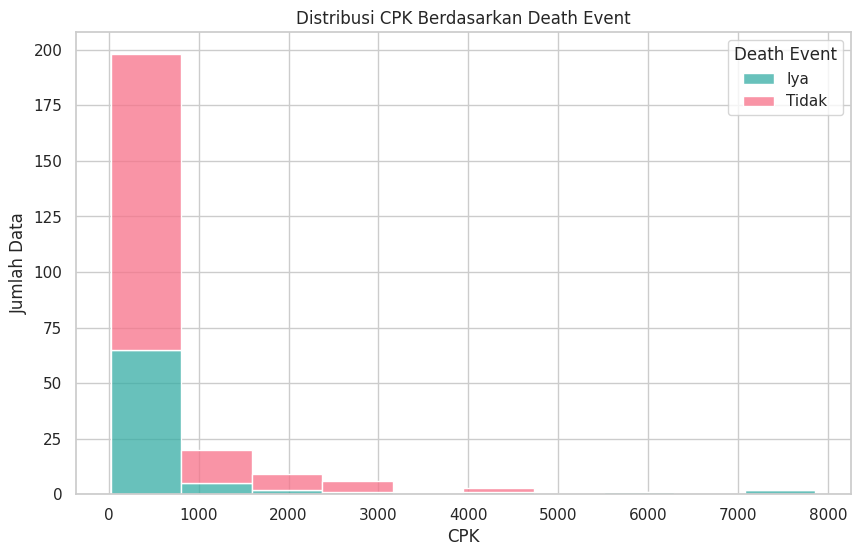

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='creatinine_phosphokinase', hue='death_event', multiple='stack', bins=10, palette='husl')
plt.title('Distribusi CPK Berdasarkan Death Event')
plt.xlabel('CPK')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada CPK paling banyak di rentan 0-1000

## 4.10 Distribusi data berdasarkan ejection_fraction  

### 4.10.2 Boxplot ejection_fraction  

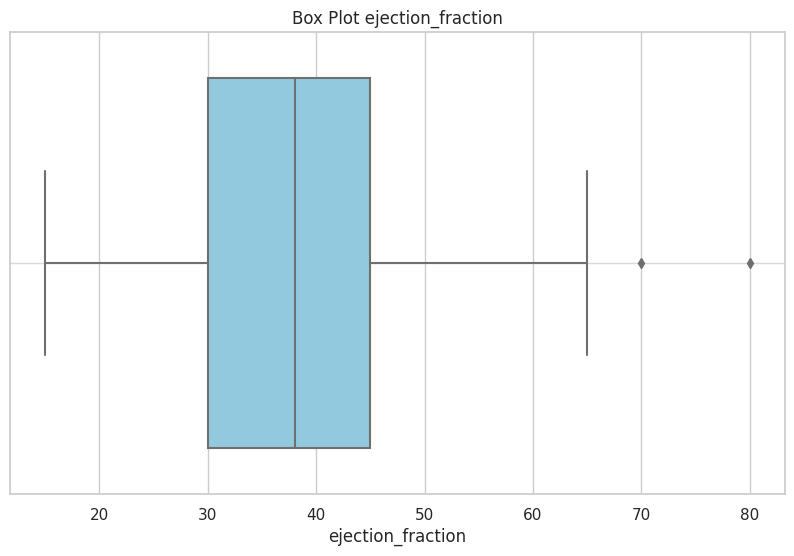

In [63]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['ejection_fraction'].dropna(), color='skyblue')
plt.title('Box Plot ejection_fraction')
plt.xlabel('ejection_fraction')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.9.2 Distribusi ejection_fraction terhadap Death event

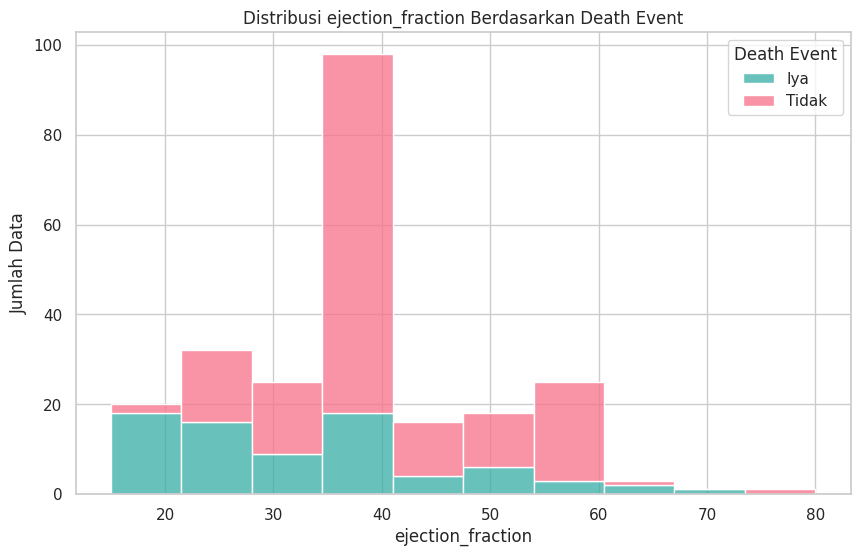

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='ejection_fraction', hue='death_event', multiple='stack', bins=10, palette='husl')
plt.title('Distribusi ejection_fraction Berdasarkan Death Event')
plt.xlabel('ejection_fraction')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada ejection_fraction paling banyak di rentan 30-40

## 4.11 Distribusi data berdasarkan platelets (trombosit)

### 4.11.1 Boxplot Trombosit

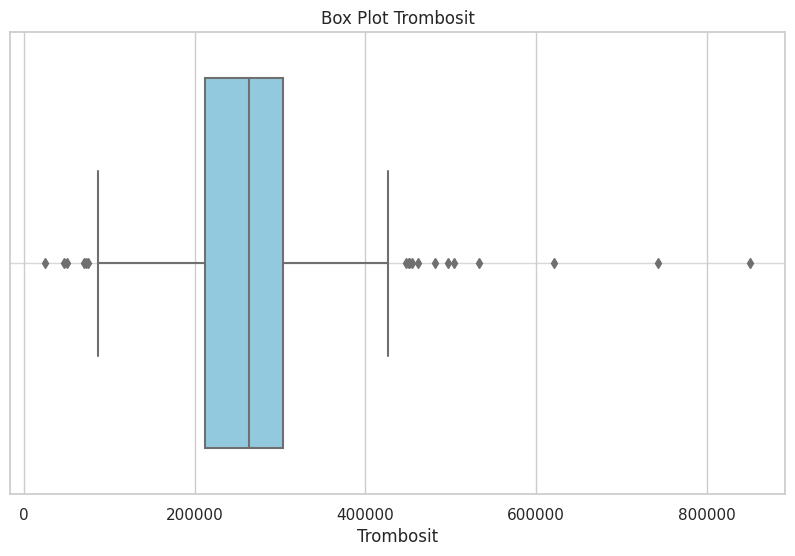

In [65]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['platelets'].dropna(), color='skyblue')
plt.title('Box Plot Trombosit')
plt.xlabel('Trombosit')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.11.2 Distribusi Trombosit terhadap Death event

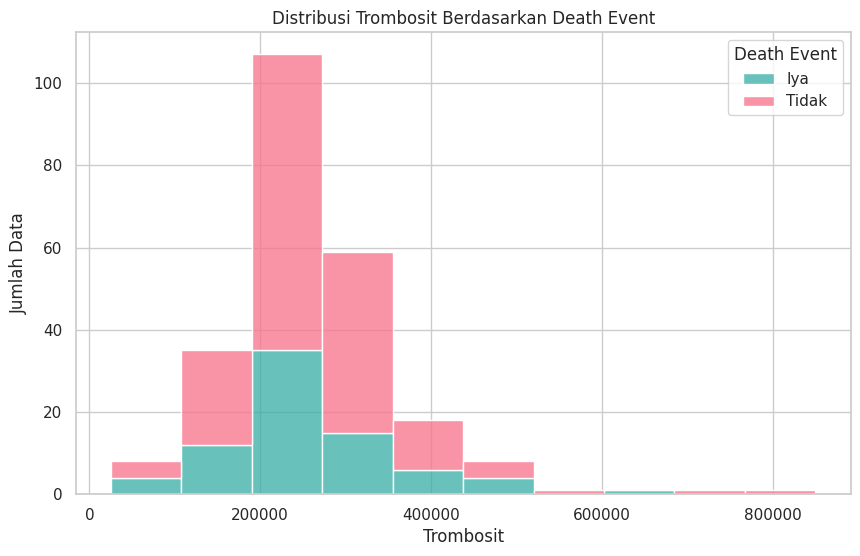

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='platelets', hue='death_event', multiple='stack', bins=10, palette='husl')
plt.title('Distribusi Trombosit Berdasarkan Death Event')
plt.xlabel('Trombosit')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada Trombosit dengan puncak data di rentan 200rb-300rb

## 4.12 Distribusi data berdasarkan serum_creatinine

### 4.12.1 Boxplot serum_creatinine

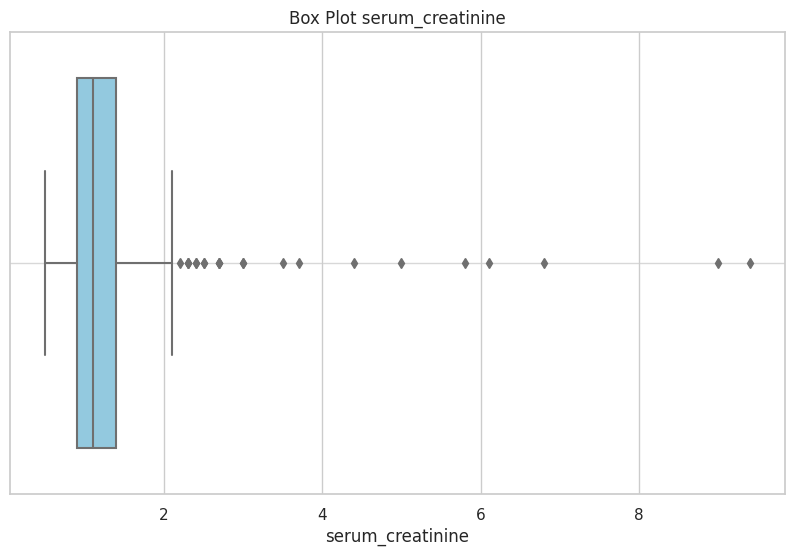

In [67]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['serum_creatinine'].dropna(), color='skyblue')
plt.title('Box Plot serum_creatinine')
plt.xlabel('serum_creatinine')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.12.2 Distribusi serum_creatinine terhadap Death event

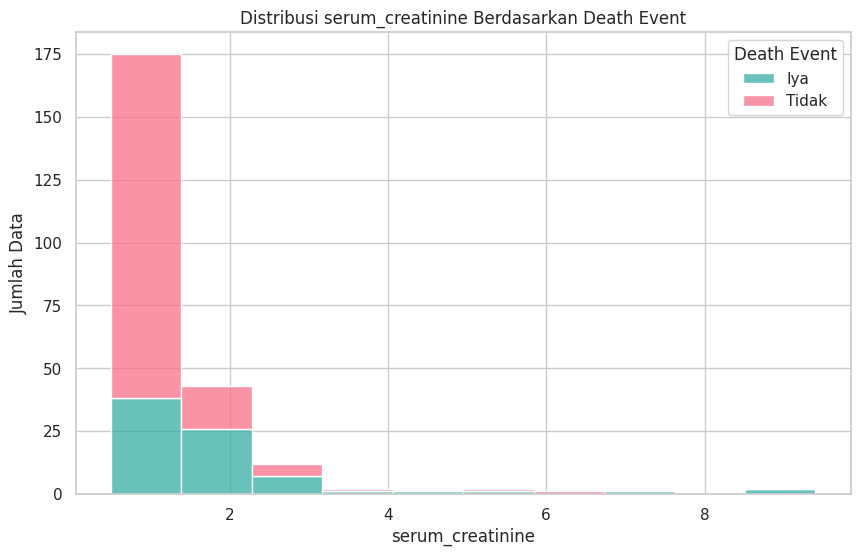

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='serum_creatinine', hue='death_event', multiple='stack', bins=10, palette='husl')
plt.title('Distribusi serum_creatinine Berdasarkan Death Event')
plt.xlabel('serum_creatinine')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada serum_creatinine paling banyak di value 1

## 4.13 Distribusi data berdasarkan serum_sodium

### 4.13.1 Boxplot serum_sodium

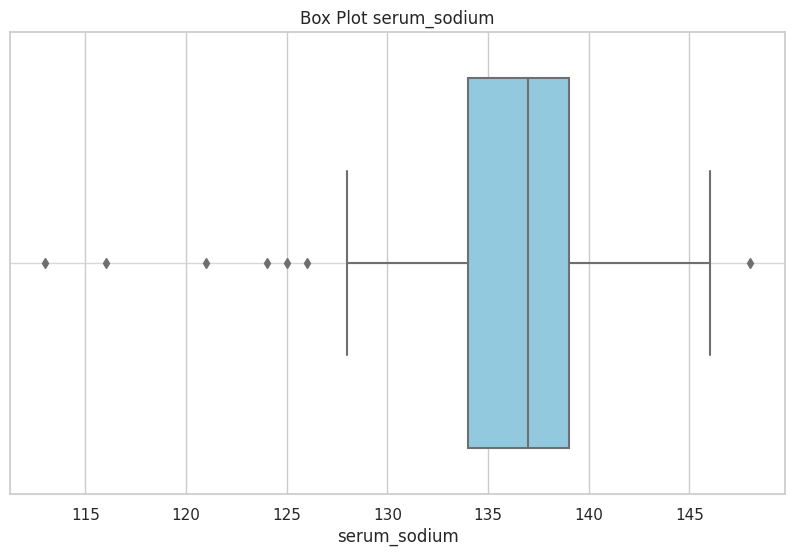

In [69]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['serum_sodium'].dropna(), color='skyblue')
plt.title('Box Plot serum_sodium')
plt.xlabel('serum_sodium')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.13.2 Distribusi serum_sodium terhadap Death event

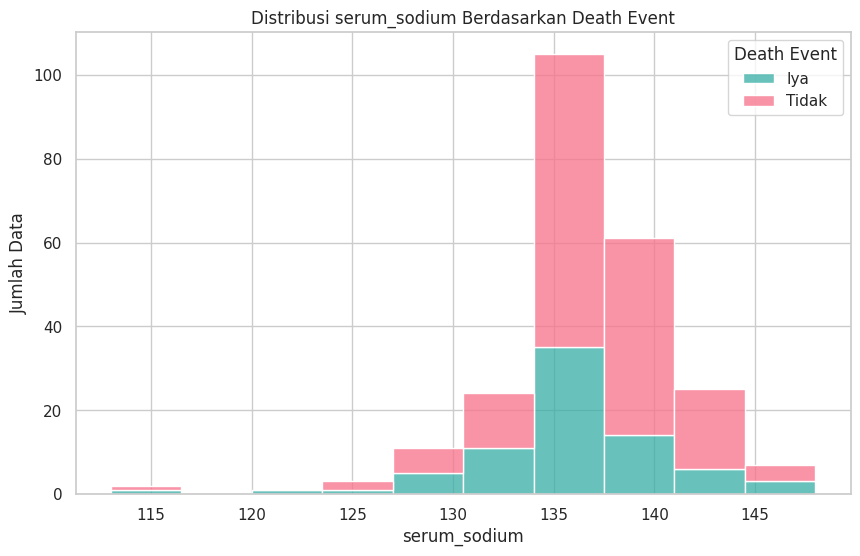

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='serum_sodium', hue='death_event', multiple='stack', bins=10, palette='husl')
plt.title('Distribusi serum_sodium Berdasarkan Death Event')
plt.xlabel('serum_sodium')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada serum_creatinine paling banyak direntan 135-140

## 4.14 Distribusi data berdasarkan time

### 4.14.1 Boxplot time

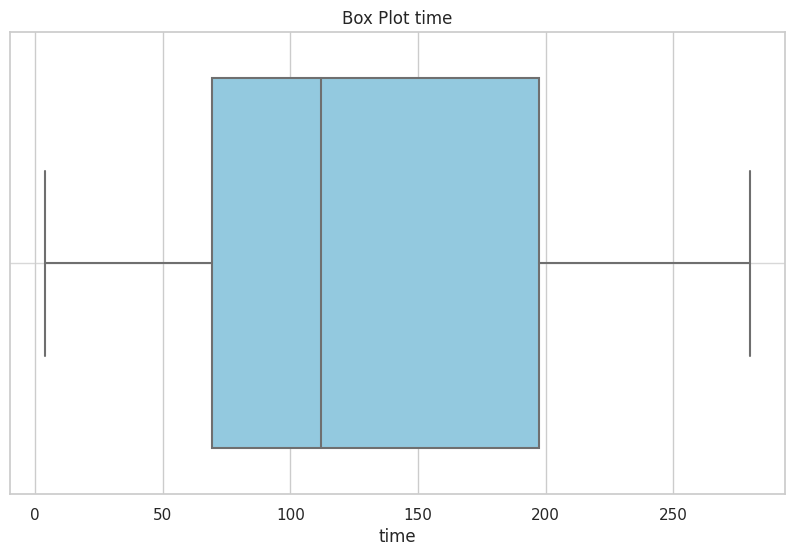

In [71]:
import seaborn as sns

# Misalkan df_train adalah DataFrame Anda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['time'].dropna(), color='skyblue')
plt.title('Box Plot time')
plt.xlabel('time')
plt.grid(axis='y', alpha=0.75)
plt.show()


### 4.14.2 Distribusi time terhadap Death event


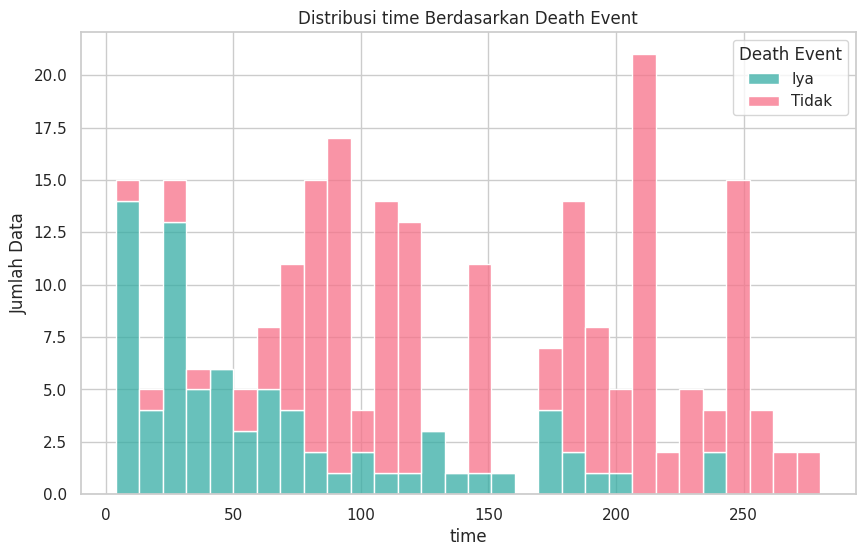

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya seaborn
sns.set(style="whitegrid")

# Membuat histogram dengan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='time', hue='death_event', multiple='stack', bins=30, palette='husl')
plt.title('Distribusi time Berdasarkan Death Event')
plt.xlabel('time')
plt.ylabel('Jumlah Data')
plt.legend(title='Death Event', labels=['Iya', 'Tidak'])  # Menambahkan legenda
plt.show()


Distribusi data pada serum_creatinine sangat variatif, namun dapat dilihat untuk kasus kematian banyak terjadi di time kurang dari 50

## 4.15 Matriks Korelasi

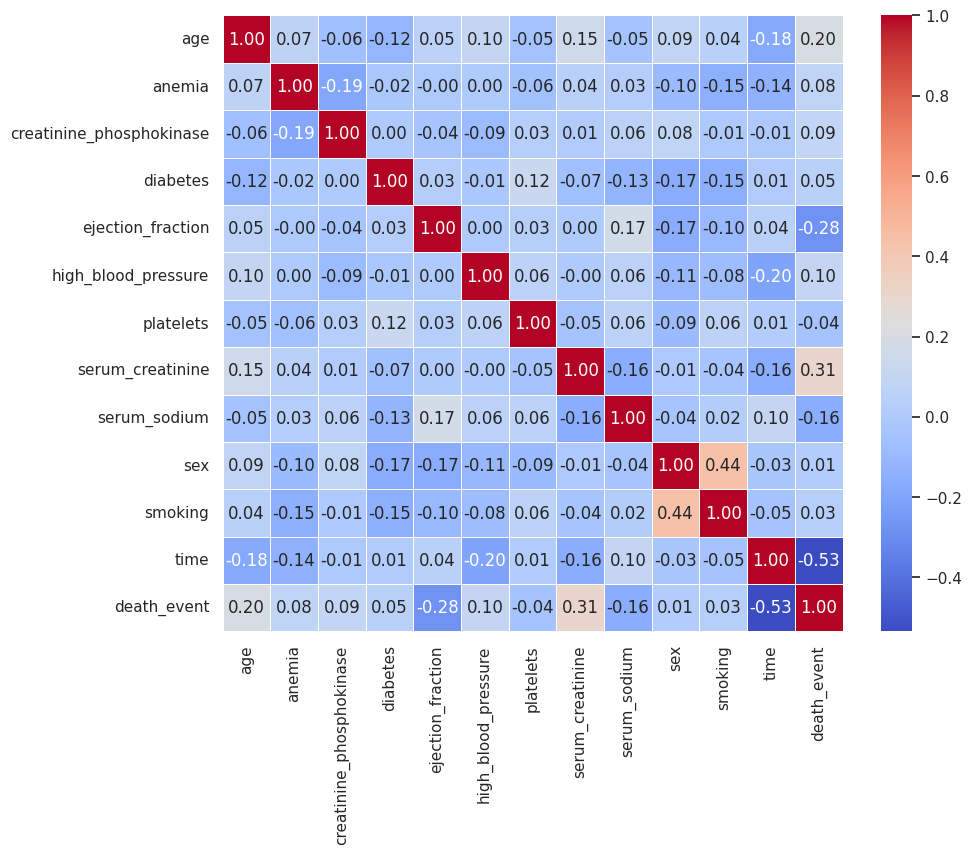

In [73]:
# Membuat matriks korelasi
correlation_matrix = df_train.corr()
# Mengatur ukuran plot
plt.figure(figsize=(10, 8))

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Menampilkan plot
plt.show()

Berikut adalah beberapa korelasi dari tabel yang diberikan:

Age & Death Event (0.289363):
Terdapat korelasi positif sebesar 0.29 antara usia (age) dan kejadian kematian (death_event). Artinya, semakin tua seseorang, semakin tinggi kemungkinan terjadinya kejadian kematian.

Ejection Fraction & Death Event (-0.257293):
Terdapat korelasi negatif sebesar -0.26 antara fraksi ejeksi jantung (ejection_fraction) dan kejadian kematian. Artinya, semakin rendah fraksi ejeksi jantung, semakin tinggi kemungkinan terjadinya kejadian kematian.

Serum Creatinine & Death Event (0.326517):
Terdapat korelasi positif sebesar 0.33 antara kadar serum kreatinin (serum_creatinine) dan kejadian kematian. Artinya, semakin tinggi kadar serum kreatinin, semakin tinggi kemungkinan terjadinya kejadian kematian.

Time & Death Event (-0.539406):
Terdapat korelasi negatif yang kuat sebesar -0.54 antara waktu (time) dan kejadian kematian. Artinya, semakin lama waktu pemeriksaan dilakukan, semakin rendah kemungkinan terjadinya kejadian kematian. Hal ini mungkin terkait dengan faktor-faktor perubahan sepanjang waktu yang memengaruhi hasil pengukuran.

In [74]:
import pandas as pd
from scipy.stats import chi2_contingency

# Pilih kolom-kolom yang ingin diuji
columns_to_test = ['anemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
columns_target = ['death_event']

# Loop melalui pasangan variabel dan lakukan uji chi-squared
for col1 in columns_to_test:
    for col2 in columns_target:
        if col1 != col2:  # Hindari membuat tabel kontingensi untuk kolom yang sama
            contingency_table = pd.crosstab(df_train[col1], df_train[col2])

            # Perform the chi-squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            # Print the results
            print(f"Chi-squared test for {col1} and {col2}:")
            print(f"  Chi-squared statistic: {chi2}")
            print(f"  P-value: {p}")
            print(f"  Degrees of freedom: {dof}")
            print("  Expected frequencies:")
            print(expected)
            print("\n")


Chi-squared test for anemia and death_event:
  Chi-squared statistic: 1.2567124822122235
  P-value: 0.2622742913948644
  Degrees of freedom: 1
  Expected frequencies:
[[89.47280335 42.52719665]
 [72.52719665 34.47280335]]


Chi-squared test for creatinine_phosphokinase and death_event:
  Chi-squared statistic: 180.1661978483874
  P-value: 0.37864889761084014
  Degrees of freedom: 175
  Expected frequencies:
[[ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 1.35564854  0.64435146]
 [ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 1.35564854  0.64435146]
 [ 0.67782427  0.32217573]
 [ 2.0334728   0.9665272 ]
 [ 2.0334728   0.9665272 ]
 [ 1.35564854  0.64435146]
 [ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 1.35564854  0.64435146]
 [ 2.71129707  1.28870293]
 [ 1.35564854  0.64435146]
 [ 2.0334728   0.9665272 ]
 [ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 0.67782427  0.32217573]
 [ 1.35564854  0.64435146]
 [ 0.67782427  0.32217

# 5. Data Preprocessing

In [75]:
X = df_train.drop('death_event', axis=1)
y = df_train['death_event']
print(X.shape)
print(y.shape)

(239, 12)
(239,)


### 5.1 Feature selection

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [77]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.07677875, 0.01120285, 0.07454779, 0.01393139, 0.12912064,
       0.01337316, 0.07681994, 0.15411779, 0.06621456, 0.01131171,
       0.01119822, 0.36138319])

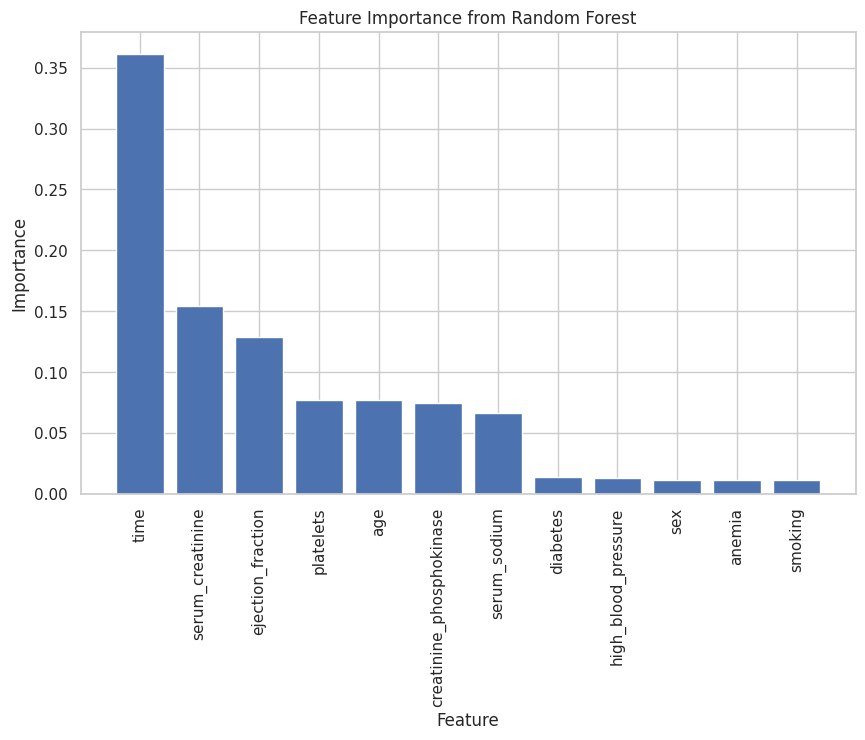

In [78]:
# Mendapatkan nama fitur
feature_names = X.columns  # Gantilah ini dengan nama kolom sesuai dengan dataset Anda

# Membuat DataFrame untuk memudahkan visualisasi
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Mengurutkan DataFrame berdasarkan nilai kepentingan fitur
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_df)), feature_importance_df['Importance'], align='center')
plt.xticks(range(len(feature_importance_df)), feature_importance_df['Feature'], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [79]:
from sklearn.feature_selection import SelectFromModel

# Menggunakan ambang batas untuk seleksi fitur
sfm = SelectFromModel(rf_model, threshold=0.02)  # Sesuaikan ambang batas sesuai kebutuhan
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold=0.02)

In [80]:
# Membuat masker untuk fitur yang dipilih
selected_features_mask = sfm.get_support()

# Mengambil nama fitur yang dipilih dari DataFrame
selected_features = X.columns[selected_features_mask]

# Menampilkan nama fitur yang dipilih
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')


In [81]:
# Membuat DataFrame baru hanya dengan fitur yang dipilih
X_selected= pd.DataFrame(X, columns=selected_features)
X_selected_test= pd.DataFrame(X_test, columns=selected_features)

# Menampilkan DataFrame baru
print("Selected Features in X_train:")
print(X_selected.shape)

print("Selected Features in X_test:")
print(X_selected_test.shape)


Selected Features in X_train:
(239, 7)
Selected Features in X_test:
(60, 7)


Didapatkan 7 Fitur pilihan yang akan digunakan, yaitu 'age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'

## 5.2 Over Sampling SMOTE

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_selected, y)


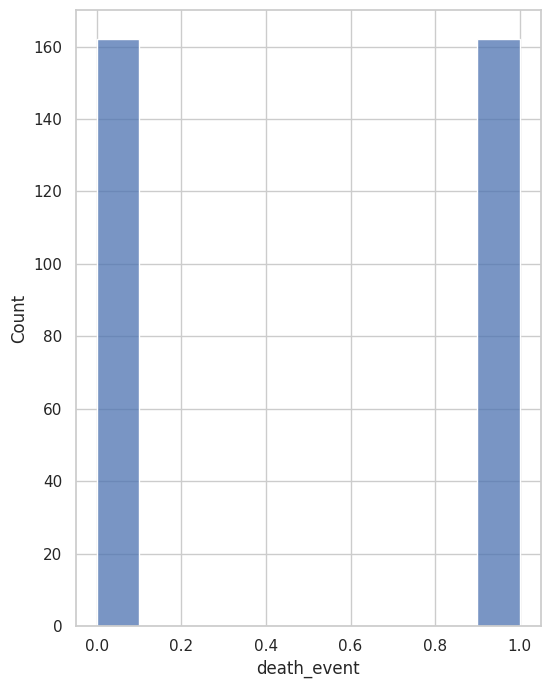

In [83]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_smote)
plt.show()

## 5.3 Over Sampling Random


In [84]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_selected, y)

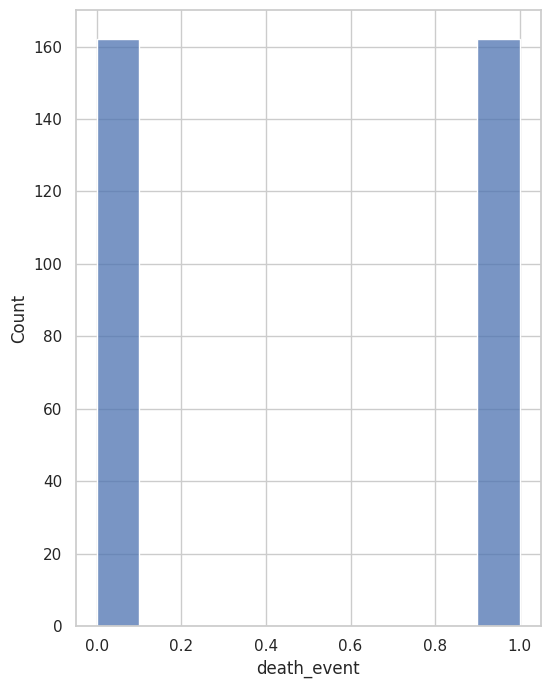

In [85]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_ros)
plt.show()

## 5.4 Under Sampling Random

In [86]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_selected, y)


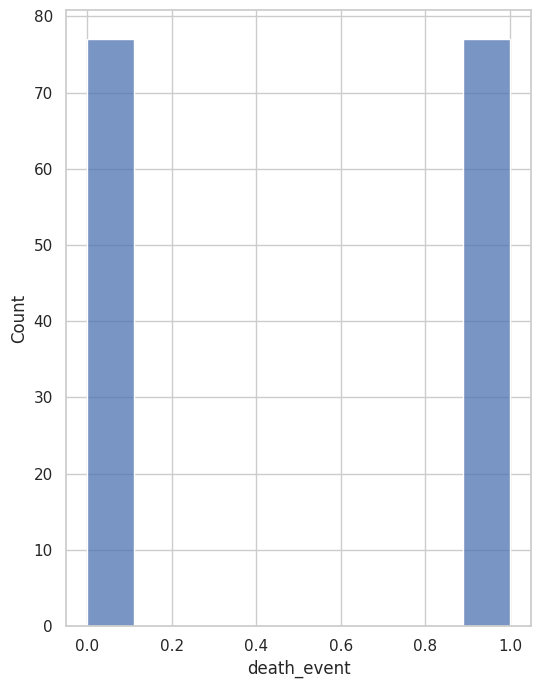

In [87]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.histplot( data=y_rus)
plt.show()

# 6. Modelling

## 6.1 Random Forest

### 6.1.1 Pelatihan model

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def cv_randomforest(X_data, y_data, data_name):
    # Create a Random Forest Classifier
    rf_classifier = RandomForestClassifier()

    # Define the parameter grid to search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Create the GridSearchCV object
    grid = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

    # Perform the cross-validation
    grid.fit(X_data, y_data)

    # Print the best parameters and corresponding accuracy
    print(f'Data {data_name}')
    print("Best Parameters: ", grid.best_params_)
    print("Best Accuracy: ", grid.best_score_)
    print()

    # Extract the best parameters for each dataset
    best_params = grid.best_params_

    # Create Random Forest Classifier with the best parameters for each dataset
    best_rf_classifier = RandomForestClassifier(**best_params)

    # Fit the models on the training data again (optional, as grid search already fits the best model)
    best_rf_classifier.fit(X_data, y_data)

    return best_rf_classifier


In [89]:
# Deklarasi best model hasil tuning
best_rf_ori = cv_randomforest(X_selected, y, 'Ori')
best_rf_smote = cv_randomforest(X_smote, y_smote, 'Smote')
best_rf_ros = cv_randomforest(X_ros, y_ros, 'ROS')
best_rf_rus = cv_randomforest(X_rus, y_rus, 'RUS')

Data Ori
Best Parameters:  {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy:  0.7658333333333334

Data Smote
Best Parameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy:  0.9071969696969697

Data ROS
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.98125

Data RUS
Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy:  0.8691666666666666



### 6.1.2 Evaluasi Model

In [90]:
def evaluasi_model(X_data, y_data, model, data_name):
  y_pred = model.predict(X_data)

  acc = accuracy_score(y_data, y_pred)
  precision = precision_score(y_data, y_pred, average='binary')
  recall = recall_score(y_data, y_pred, average='binary')
  f1 = f1_score(y_data, y_pred, average='binary')

  print(f'{data_name}:')
  print("Random Forest Accuracy:", acc)
  print("Random Forest Precision:", precision)
  print("Random Forest Recall:", recall)
  print("Random Forest F1-score:", f1)
  print(f'Classification Report:\n{classification_report(y_data, y_pred)}')

  print()

  return acc, precision, recall, f1

In [91]:
acc_rf_ori, precision_rf_ori, recall_rf_ori, f1_rf_ori = evaluasi_model(X_selected_test, y_test, best_rf_ori, 'Ori')
acc_rf_smote, precision_rf_smote, recall_rf_smote, f1_rf_smote = evaluasi_model(X_selected_test, y_test, best_rf_smote, 'smote')
acc_rf_ros, precision_rf_ros, recall_rf_ros, f1_rf_ros = evaluasi_model(X_selected_test, y_test, best_rf_ros, 'ros')
acc_rf_rus, precision_rf_rus, recall_rf_rus, f1_rf_rus = evaluasi_model(X_selected_test, y_test, best_rf_rus, 'rus')

Ori:
Random Forest Accuracy: 0.8166666666666667
Random Forest Precision: 0.75
Random Forest Recall: 0.631578947368421
Random Forest F1-score: 0.6857142857142857
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60


smote:
Random Forest Accuracy: 0.8
Random Forest Precision: 0.7058823529411765
Random Forest Recall: 0.631578947368421
Random Forest F1-score: 0.6666666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.

## 6.2 Bagging

### 6.2.1 Pelatihan Model

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

def cv_bagging(X_data, y_data, data_name):
  # Inisialisasi model pohon keputusan
  base_classifier = DecisionTreeClassifier(random_state=42)

  # Inisialisasi model bagging dengan pohon keputusan sebagai base classifier
  bagging_classifier = BaggingClassifier(base_classifier, random_state=42)

  # Definisikan grid parameter yang akan diuji
  param_grid = {
      'base_estimator__max_depth': [None, 5, 10, 15],
      'base_estimator__min_samples_split': [2, 5, 10],
      'n_estimators': [10, 50, 100]
  }

  # Inisialisasi GridSearchCV
  grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='recall')

  # Lakukan pencarian grid pada data pelatihan
  grid_search.fit(X_data, y_data)

  # Print the best parameters and corresponding accuracy
  print(f'Data {data_name}')
  print("Best Parameters: ", grid_search.best_params_)
  print("Best Accuracy: ", grid_search.best_score_)
  print()

  best_bagging_model = grid_search.best_estimator_

  return best_bagging_model

In [93]:
# Deklarasi best model hasil tuning
best_bg_ori = cv_bagging(X_selected, y, 'Ori')
best_bg_smote = cv_bagging(X_smote, y_smote, 'Smote')
best_bg_ros = cv_bagging(X_ros, y_ros, 'ROS')
best_bg_rus = cv_bagging(X_rus, y_rus, 'RUS')

Data Ori
Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'n_estimators': 50}
Best Accuracy:  0.6875

Data Smote
Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 5, 'n_estimators': 10}
Best Accuracy:  0.8515151515151516

Data ROS
Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 2, 'n_estimators': 50}
Best Accuracy:  0.968939393939394

Data RUS
Best Parameters:  {'base_estimator__max_depth': None, 'base_estimator__min_samples_split': 10, 'n_estimators': 10}
Best Accuracy:  0.8066666666666666



### 6.2.2 Evaluasi Model

In [94]:
acc_bg_ori, precision_bg_ori, recall_bg_ori, f1_bg_ori = evaluasi_model(X_selected_test, y_test, best_bg_ori, 'Ori')
acc_bg_smote, precision_bg_smote, recall_bg_smote, f1_bg_smote = evaluasi_model(X_selected_test, y_test, best_bg_smote, 'smote')
acc_bg_ros, precision_bg_ros, recall_bg_ros, f1_bg_ros = evaluasi_model(X_selected_test, y_test, best_bg_ros, 'ros')
acc_bg_rus, precision_bg_rus, recall_bg_rus, f1_bg_rus = evaluasi_model(X_selected_test, y_test, best_bg_rus, 'rus')

Ori:
Random Forest Accuracy: 0.8333333333333334
Random Forest Precision: 0.7647058823529411
Random Forest Recall: 0.6842105263157895
Random Forest F1-score: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60


smote:
Random Forest Accuracy: 0.7666666666666667
Random Forest Precision: 0.6470588235294118
Random Forest Recall: 0.5789473684210527
Random Forest F1-score: 0.6111111111111113
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.65      0.58      0.61        19

    accuracy                           0.77        60
   macro avg       0.73      0.72      0.72        60


## 6.3 Adaboost

### 6.3.1 Pelatihan Model

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

def cv_adaboost(X_data, y_data, data_name):
  # Inisialisasi model pohon keputusan
  base_classifier = DecisionTreeClassifier(random_state=42)

  # Inisialisasi model adaboost dengan pohon keputusan sebagai base classifier
  adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

  # Definisikan grid parameter yang akan diuji
  param_grid = {
      'n_estimators': [50, 100, 200],
      'learning_rate': [0.01, 0.1, 0.5, 1.0],
  }

  # Inisialisasi GridSearchCV
  grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='recall')

  # Lakukan pencarian grid pada data pelatihan
  grid_search.fit(X_data, y_data)

  # Print the best parameters and corresponding accuracy
  print(f'Data {data_name}')
  print("Best Parameters: ", grid_search.best_params_)
  print("Best Accuracy: ", grid_search.best_score_)
  print()

  best_adaboost_model = grid_search.best_estimator_

  return best_adaboost_model

In [96]:
# Deklarasi best model hasil tuning
best_ab_ori = cv_adaboost(X_selected, y, 'Ori')
best_ab_smote = cv_adaboost(X_smote, y_smote, 'Smote')
best_ab_ros = cv_adaboost(X_ros, y_ros, 'ROS')
best_ab_rus = cv_adaboost(X_rus, y_rus, 'RUS')

Data Ori
Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy:  0.6358333333333334

Data Smote
Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy:  0.8077651515151516

Data ROS
Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy:  0.9378787878787879

Data RUS
Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 50}
Best Accuracy:  0.74



### 6.3.2 Evaluasi Model

In [97]:
acc_ab_ori, precision_ab_ori, recall_ab_ori, f1_ab_ori = evaluasi_model(X_selected_test, y_test, best_ab_ori, 'Ori')
acc_ab_smote, precision_ab_smote, recall_ab_smote, f1_ab_smote = evaluasi_model(X_selected_test, y_test, best_ab_smote, 'smote')
acc_ab_ros, precision_ab_ros, recall_ab_ros, f1_ab_ros = evaluasi_model(X_selected_test, y_test, best_ab_ros, 'ros')
acc_ab_rus, precision_ab_rus, recall_ab_rus, f1_ab_rus = evaluasi_model(X_selected_test, y_test, best_ab_rus, 'rus')

Ori:
Random Forest Accuracy: 0.7333333333333333
Random Forest Precision: 0.5789473684210527
Random Forest Recall: 0.5789473684210527
Random Forest F1-score: 0.5789473684210527
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.58      0.58      0.58        19

    accuracy                           0.73        60
   macro avg       0.69      0.69      0.69        60
weighted avg       0.73      0.73      0.73        60


smote:
Random Forest Accuracy: 0.85
Random Forest Precision: 0.7272727272727273
Random Forest Recall: 0.8421052631578947
Random Forest F1-score: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.73      0.84      0.78        19

    accuracy                           0.85        60
   macro avg       0.82      0.85      0.83        60
weighted avg  

## 6.4 Gradientboost

### 6.4.1 Pelatihan Model

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

def cv_gradientboost(X_data, y_data, data_name):
  # Inisialisasi model GradientBoostingClassifier
  gradient_boost_classifier = GradientBoostingClassifier(random_state=42)

  # Definisikan grid parameter yang akan diuji
  param_grid = {
      'n_estimators': [50, 100, 200],
      'learning_rate': [0.01, 0.1, 0.5],
      'max_depth': [3, 5, 7],
      'min_samples_split': [2, 5, 10],
  }

  # Inisialisasi GridSearchCV
  grid_search = GridSearchCV(gradient_boost_classifier, param_grid, cv=5, scoring='recall')

  # Lakukan pencarian grid pada data pelatihan
  grid_search.fit(X_data, y_data)

  # Print the best parameters and corresponding accuracy
  print(f'Data {data_name}')
  print("Best Parameters: ", grid_search.best_params_)
  print("Best Accuracy: ", grid_search.best_score_)
  print()

  best_gradientboost_model = grid_search.best_estimator_

  return best_gradientboost_model

In [99]:
# Deklarasi best model hasil tuning
best_gb_ori = cv_gradientboost(X_selected, y, 'Ori')
best_gb_smote = cv_gradientboost(X_smote, y_smote, 'Smote')
best_gb_ros = cv_gradientboost(X_ros, y_ros, 'ROS')
best_gb_rus = cv_gradientboost(X_rus, y_rus, 'RUS')

Data Ori
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy:  0.7275

Data Smote
Best Parameters:  {'learning_rate': 0.5, 'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy:  0.8821969696969697

Data ROS
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy:  0.968939393939394

Data RUS
Best Parameters:  {'learning_rate': 0.5, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy:  0.8316666666666667



### 6.4.2 Evaluasi Model

In [100]:
acc_gb_ori, precision_gb_ori, recall_gb_ori, f1_gb_ori = evaluasi_model(X_selected_test, y_test, best_gb_ori, 'Ori')
acc_gb_smote, precision_gb_smote, recall_gb_smote, f1_gb_smote = evaluasi_model(X_selected_test, y_test, best_gb_smote, 'smote')
acc_gb_ros, precision_gb_ros, recall_gb_ros, f1_gb_ros = evaluasi_model(X_selected_test, y_test, best_gb_ros, 'ros')
acc_gb_rus, precision_gb_rus, recall_gb_rus, f1_gb_rus = evaluasi_model(X_selected_test, y_test, best_gb_rus, 'rus')

Ori:
Random Forest Accuracy: 0.8
Random Forest Precision: 0.7333333333333333
Random Forest Recall: 0.5789473684210527
Random Forest F1-score: 0.6470588235294117
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        41
           1       0.73      0.58      0.65        19

    accuracy                           0.80        60
   macro avg       0.78      0.74      0.75        60
weighted avg       0.79      0.80      0.79        60


smote:
Random Forest Accuracy: 0.8166666666666667
Random Forest Precision: 0.7222222222222222
Random Forest Recall: 0.6842105263157895
Random Forest F1-score: 0.7027027027027027
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.72      0.68      0.70        19

    accuracy                           0.82        60
   macro avg       0.79      0.78      0.79        60
weighted avg   

## 6.5 Stacking

### 6.5.1 Pelatihan Model

In [109]:
#Modelling teknik stacking dengan algoritma KNN, GaussianNB, SVC dan meta model logistic regression
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

def stacking(X_data, y_data, data_name):
  estimators = [
    ('knn' , KNeighborsClassifier()),
    ('nb' , GaussianNB()),
    ('svc' , SVC())
  ]

  sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  sc.fit(X_data, y_data)

  return sc


In [110]:
# Deklarasi best model hasil tuning
best_sc_ori = stacking(X_selected, y, 'Ori')
best_sc_smote = stacking(X_smote, y_smote, 'Smote')
best_sc_ros = stacking(X_ros, y_ros, 'ROS')
best_sc_rus = stacking(X_rus, y_rus, 'RUS')

### 6.5.2 Evaluasi Model

In [111]:
acc_sc_ori, precision_sc_ori, recall_sc_ori, f1_sc_ori = evaluasi_model(X_selected_test, y_test, best_sc_ori, 'Ori')
acc_sc_smote, precision_sc_smote, recall_sc_smote, f1_sc_smote = evaluasi_model(X_selected_test, y_test, best_sc_smote, 'smote')
acc_sc_ros, precision_sc_ros, recall_sc_ros, f1_sc_ros = evaluasi_model(X_selected_test, y_test, best_sc_ros, 'ros')
acc_sc_rus, precision_sc_rus, recall_sc_rus, f1_sc_rus = evaluasi_model(X_selected_test, y_test, best_sc_rus, 'rus')

Ori:
Random Forest Accuracy: 0.7666666666666667
Random Forest Precision: 0.7272727272727273
Random Forest Recall: 0.42105263157894735
Random Forest F1-score: 0.5333333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg       0.76      0.77      0.75        60


smote:
Random Forest Accuracy: 0.8333333333333334
Random Forest Precision: 0.7647058823529411
Random Forest Recall: 0.6842105263157895
Random Forest F1-score: 0.7222222222222222
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60

# 7. Evaluasi

In [112]:
evaluasi = {'model_x_dataset': ['RF Ori', 'RF Smote', 'RF ROS', 'RF RUS', 'BG Ori', 'BG Smote', 'BG ROS', 'BG RUS', 'AB Ori', 'AB Smote', 'AB ROS', 'AB RUS', 'GB Ori', 'GB Smote', 'GB ROS', 'GB RUS', 'SC Ori', 'SC Smote', 'SC ROS', 'SC RUS'],
            'accuracy': [acc_rf_ori, acc_rf_smote, acc_rf_ros, acc_rf_rus, acc_bg_ori, acc_bg_smote, acc_bg_ros, acc_bg_rus, acc_ab_ori, acc_ab_smote, acc_ab_ros, acc_ab_rus, acc_gb_ori, acc_gb_smote, acc_gb_ros, acc_gb_rus, acc_sc_ori, acc_sc_smote, acc_sc_ros, acc_sc_rus],
            'precision': [precision_rf_ori, precision_rf_smote, precision_rf_ros, precision_rf_rus, precision_bg_ori, precision_bg_smote, precision_bg_ros, precision_bg_rus, precision_ab_ori, precision_ab_smote, precision_ab_ros, precision_ab_rus, precision_gb_ori, precision_gb_smote, precision_gb_ros, precision_gb_rus, precision_sc_ori, precision_sc_smote, precision_sc_ros, precision_sc_rus],
            'recall': [recall_rf_ori, recall_rf_smote, recall_rf_ros, recall_rf_rus, recall_bg_ori, recall_bg_smote, recall_bg_ros, recall_bg_rus, recall_ab_ori, recall_ab_smote, recall_ab_ros, recall_ab_rus, recall_gb_ori, recall_gb_smote, recall_gb_ros, recall_gb_rus, recall_sc_ori, recall_sc_smote, recall_sc_ros, recall_sc_rus],
            'f1-score': [f1_rf_ori, f1_rf_smote, f1_rf_ros, f1_rf_rus, f1_bg_ori, f1_bg_smote, f1_bg_ros, f1_bg_rus, f1_ab_ori, f1_ab_smote, f1_ab_ros, f1_ab_rus, f1_gb_ori, f1_gb_smote, f1_gb_ros, f1_gb_rus, f1_sc_ori, f1_sc_smote, f1_sc_ros, f1_sc_rus]}

evaluasi

{'model_x_dataset': ['RF Ori',
  'RF Smote',
  'RF ROS',
  'RF RUS',
  'BG Ori',
  'BG Smote',
  'BG ROS',
  'BG RUS',
  'AB Ori',
  'AB Smote',
  'AB ROS',
  'AB RUS',
  'GB Ori',
  'GB Smote',
  'GB ROS',
  'GB RUS',
  'SC Ori',
  'SC Smote',
  'SC ROS',
  'SC RUS'],
 'accuracy': [0.8166666666666667,
  0.8,
  0.85,
  0.8166666666666667,
  0.8333333333333334,
  0.7666666666666667,
  0.8333333333333334,
  0.8,
  0.7333333333333333,
  0.85,
  0.85,
  0.7833333333333333,
  0.8,
  0.8166666666666667,
  0.8,
  0.7833333333333333,
  0.7666666666666667,
  0.8333333333333334,
  0.75,
  0.8],
 'precision': [0.75,
  0.7058823529411765,
  0.8125,
  0.7222222222222222,
  0.7647058823529411,
  0.6470588235294118,
  0.7647058823529411,
  0.6666666666666666,
  0.5789473684210527,
  0.7272727272727273,
  0.8125,
  0.6153846153846154,
  0.7333333333333333,
  0.7222222222222222,
  0.7333333333333333,
  0.65,
  0.7272727272727273,
  0.7647058823529411,
  0.6428571428571429,
  0.7058823529411765],
 'reca

In [113]:
import numpy as np

# Membulatkan semua angka dalam matriks evaluasi menjadi 2 digit dibelakang koma
for key in evaluasi:
    if key != 'model_x_dataset':
      evaluasi[key] = np.around(evaluasi[key], decimals=2)

# Menampilkan matriks evaluasi yang telah dibulatkan
print(evaluasi)


{'model_x_dataset': ['RF Ori', 'RF Smote', 'RF ROS', 'RF RUS', 'BG Ori', 'BG Smote', 'BG ROS', 'BG RUS', 'AB Ori', 'AB Smote', 'AB ROS', 'AB RUS', 'GB Ori', 'GB Smote', 'GB ROS', 'GB RUS', 'SC Ori', 'SC Smote', 'SC ROS', 'SC RUS'], 'accuracy': array([0.82, 0.8 , 0.85, 0.82, 0.83, 0.77, 0.83, 0.8 , 0.73, 0.85, 0.85,
       0.78, 0.8 , 0.82, 0.8 , 0.78, 0.77, 0.83, 0.75, 0.8 ]), 'precision': array([0.75, 0.71, 0.81, 0.72, 0.76, 0.65, 0.76, 0.67, 0.58, 0.73, 0.81,
       0.62, 0.73, 0.72, 0.73, 0.65, 0.73, 0.76, 0.64, 0.71]), 'recall': array([0.63, 0.63, 0.68, 0.68, 0.68, 0.58, 0.68, 0.74, 0.58, 0.84, 0.68,
       0.84, 0.58, 0.68, 0.58, 0.68, 0.42, 0.68, 0.47, 0.63]), 'f1-score': array([0.69, 0.67, 0.74, 0.7 , 0.72, 0.61, 0.72, 0.7 , 0.58, 0.78, 0.74,
       0.71, 0.65, 0.7 , 0.65, 0.67, 0.53, 0.72, 0.55, 0.67])}


In [114]:
df_evaluasi = pd.DataFrame(evaluasi)
df_evaluasi

,model_x_dataset,accuracy,precision,recall,f1-score
0,RF Ori,0.82,0.75,0.63,0.69
1,RF Smote,0.80,0.71,0.63,0.67
2,RF ROS,0.85,0.81,0.68,0.74
3,RF RUS,0.82,0.72,0.68,0.70
4,BG Ori,0.83,0.76,0.68,0.72
5,BG Smote,0.77,0.65,0.58,0.61
6,BG ROS,0.83,0.76,0.68,0.72
7,BG RUS,0.80,0.67,0.74,0.70
8,AB Ori,0.73,0.58,0.58,0.58
9,AB Smote,0.85,0.73,0.84,0.78


Berdasarkan hasil yang diberikan, model yang menonjol adalah Model AdaBoost dengan dataset SMOTE dengan f1-score sebesar 0.78.

F1-score yang tinggi menunjukkan keseimbangan yang baik antara kemampuan model dalam mengklasifikasikan positif sejati (recall) dan menghindari kesalahan klasifikasi positif palsu (presisi).

# Model Inference

In [130]:
y_test.loc[113]

1

In [129]:
age = 70
creatinine_phosphokinase = 143
ejection_fraction = 60
platelets = 351000
serum_creatinine = 1.3
serum_sodium = 137
time = 90

test = [[age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time]]

model = best_ab_smote

hasil = model.predict(test)

print(hasil)



[0]
